#Violência Rio de Janeiro - Análise de exploração de dados

A seguinte análise explorátoria tem como objetivo extrair dados e comportamentos sobre a série histórica de violência no estado do Rio de Janeiro. A base de dados escolhida para esse trabalho está disponível no site do Institudo de Segerunça Pública do Rio de Janeiro, onde são tratados dados abertos de estatística de segurança pública. No dataset são dispostos dados a partir do ano de 2003, dividios entre variáveis como região, cidade, tipo do crime, policias envolvidos e fase de investigacão.

In [1]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BaseDPEvolucaoMensalCisp.csv', encoding='latin-1', sep=';',  date_parser = True)

In [3]:
df.columns

Index(['CISP', 'mes', 'ano', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc',
       'Regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [4]:
df.describe()

,CISP,mes,ano,AISP,RISP,mcirc,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,apreensao_drogas,recuperacao_veiculos,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000,3.142300e+04,31423.000000,31423.000000,31423.000000,31423.000000,...,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000,31423.000000
mean,81.717723,6.424403,2012.392961,20.031060,3.870191,3.801017e+06,3.127454,0.027082,0.104128,3.258664,...,11.043026,14.647233,41.407440,3.145785,0.383891,0.023836,0.014416,0.002419,425.976355,2.986920
std,48.315494,3.451253,5.610804,11.329228,2.012354,1.755954e+06,4.546230,0.177497,0.384742,4.666204,...,14.158275,25.159471,39.883806,4.115160,1.048383,0.186348,0.136151,0.051027,380.373352,0.113617
min,1.000000,1.000000,2003.000000,1.000000,1.000000,3.300100e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,38.000000,3.000000,2008.000000,10.000000,2.000000,3.302601e+06,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,3.000000
50%,78.000000,6.000000,2012.000000,20.000000,4.000000,3.304557e+06,1.000000,0.000000,0.000000,1.000000,...,7.000000,5.000000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,356.000000,3.000000
75%,125.000000,9.000000,2017.000000,30.000000,6.000000,3.304557e+06,4.000000,0.000000,0.000000,4.000000,...,14.000000,17.000000,56.000000,4.000000,1.000000,0.000000,0.000000,0.000000,642.000000,3.000000
max,168.000000,12.000000,2022.000000,41.000000,7.000000,9.999999e+06,43.000000,6.000000,9.000000,43.000000,...,348.000000,359.000000,370.000000,191.000000,112.000000,10.000000,4.000000,2.000000,2968.000000,3.000000


In [5]:
(df.isnull().sum()/df.shape[0]*100)[:60]

CISP                          0.0
mes                           0.0
ano                           0.0
mes_ano                       0.0
AISP                          0.0
RISP                          0.0
munic                         0.0
mcirc                         0.0
Regiao                        0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
cvli                          0.0
hom_por_interv_policial       0.0
letalidade_violenta           0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_transeunte              0.0
roubo_celular                 0.0
roubo_em_coletivo             0.0
roubo_rua                     0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_banco                   0.0
roubo_cx_eletr

Verificando algumas estatísticas sobre crimes

In [6]:
df.columns

Index(['CISP', 'mes', 'ano', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc',
       'Regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [7]:
df.groupby(['munic','ano']).sum()

CISP  mes  AISP  RISP  \
munic                                             ano                           
Angra dos Reis                                    2003  1992   78   393    63   
                                                  2004  1992   78   396    60   
                                                  2005  1992   78   396    60   
                                                  2006  1992   78   396    60   
                                                  2007  1992   78   396    60   
...                                                      ...  ...   ...   ...   
Volta Redonda                                     2019   558   21   168    30   
Volta Redonda                                     2019   558   57   168    30   
                                                  2020  1116   78   336    60   
                                                  2021  1116   78   336    60   
                                                  2022   558   21   168    30   

                                                           mcirc  hom_doloso  \
munic                                             ano                          
Angra dos Reis                                    2003  39601200          65   
                                                  2004  39601200          64   
                                                  2005  39601200          83   
                                                  2006  39601200          61   
                                                  2007  39601200          72   
...                                                          ...         ...   
Volta Redonda                                     2019  19837830          51   
Volta Redonda                                     2019  19837830          38   
                                                  2020  39675660          70   
                                                  2021  39675660          69   
                                                  2022  19837830          33   

                                                        lesao_corp_morte  \
munic                                             ano                      
Angra dos Reis                                    2003                 0   
                                                  2004                 0   
                                                  2005                 0   
                                                  2006                 0   
                                                  2007                 0   
...                                                                  ...   
Volta Redonda                                     2019                 0   
Volta Redonda                                     2019                 1   
                                                  2020                 0   
                                                  2021                 0   
                                                  2022                 0   

                                                        latrocinio  cvli  \
munic                                             ano                      
Angra dos Reis                                    2003           2    67   
                                                  2004           0    64   
                                                  2005           3    86   
                                                  2006           2    63   
                                                  2007           0    72   
...                                                            ...   ...   
Volta Redonda                                     2019           0    51   
Volta Redonda                                     2019           0    39   
                                                  2020           1    71   
                                                  2021           2    71   
                                                  2022      

Dos muitos dados e possibilidades de visualização, tem-se a análise de roubo de veículos.

Roubos de veículos por ano no estado ao longo do tempo

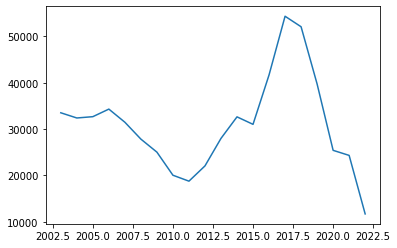

In [55]:
plt.figsize=(20, 15)
plt.plot(df.groupby(['ano']).sum().roubo_veiculo)

Furto de veículos por ano no estado ao longo do tempo

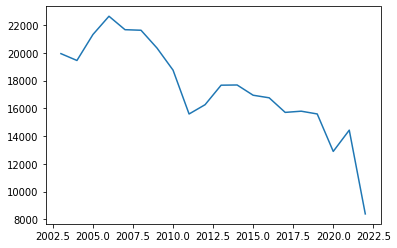

In [56]:
plt.figsize=(20, 15)
plt.plot(df.groupby(['ano']).sum().furto_veiculos)

Recuperação de veículos por ano no estado ao longo do tempo

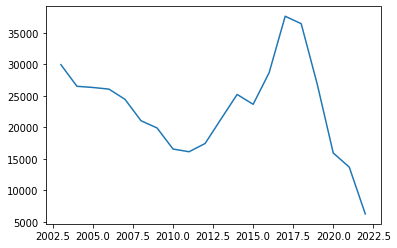

In [57]:
plt.figsize=(20, 15)
plt.plot(df.groupby(['ano']).sum().recuperacao_veiculos)

Em todos os casos, nota-se que há uma queda nos dados de registros relacionados crimes com veículos.

Análise de roubo de veículos em todos os municípios 

In [8]:
aux1 = df.groupby(['munic','ano']).sum().roubo_veiculo.reset_index()

In [ ]:
aux1[aux1.munic == 'Araruama']

,munic,ano,roubo_veiculo
21,Araruama,2003,52
22,Araruama,2004,49
23,Araruama,2005,34
24,Araruama,2006,43
25,Araruama,2007,39
26,Araruama,2008,56
27,Araruama,2009,57
28,Araruama,2010,42
29,Araruama,2011,49
30,Araruama,2012,34


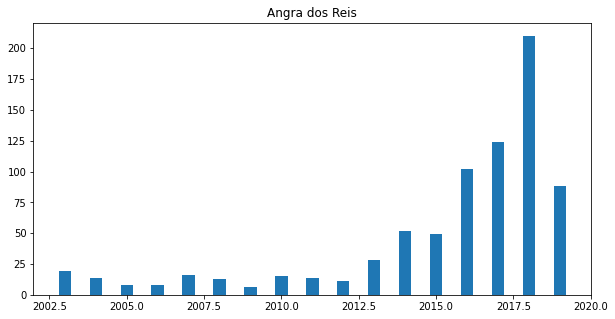

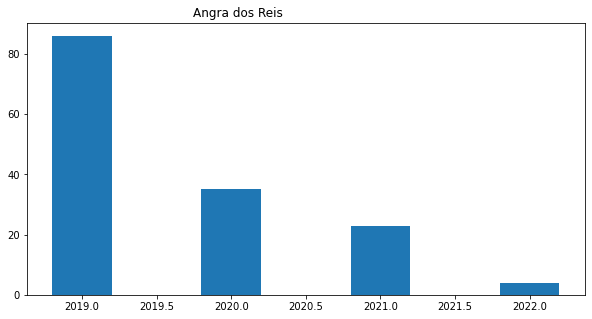

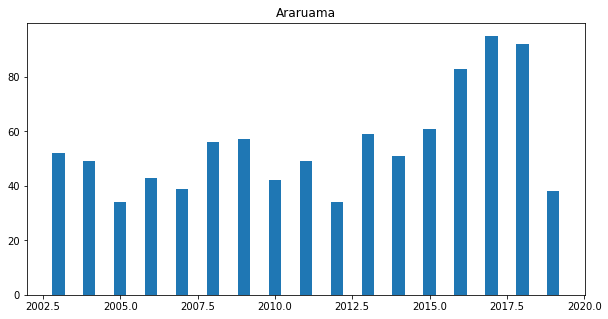

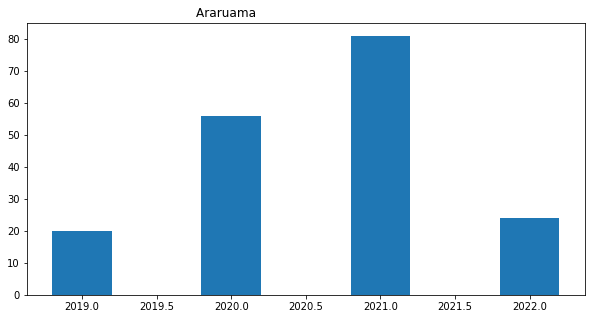

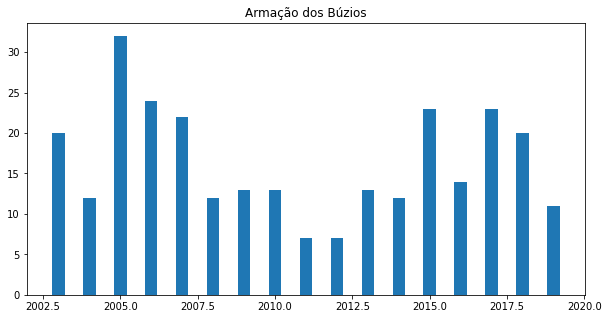

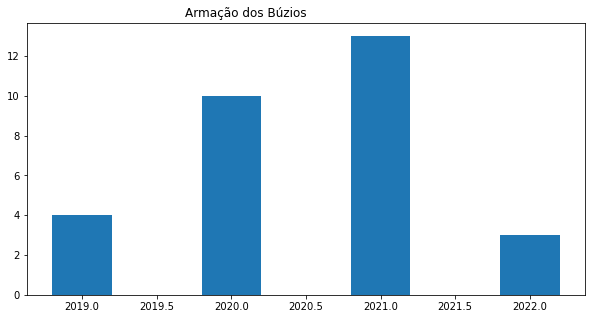

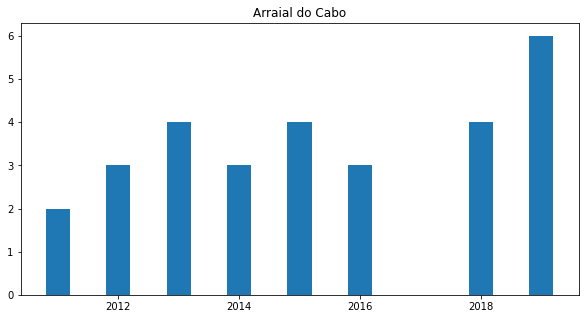

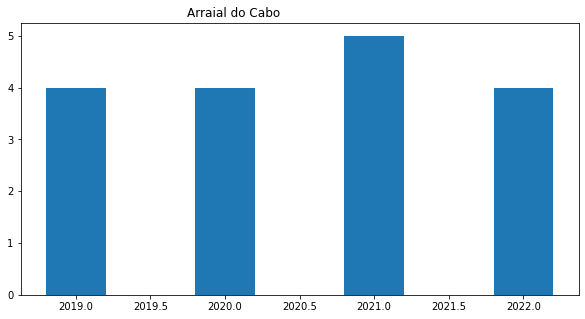

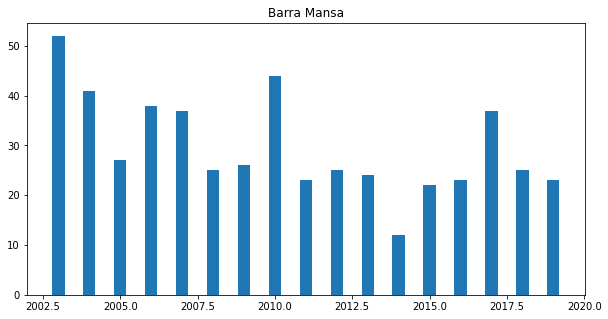

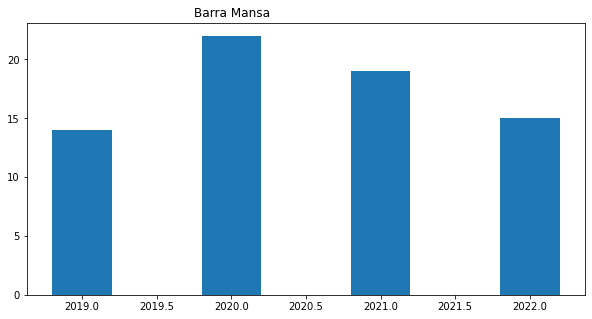

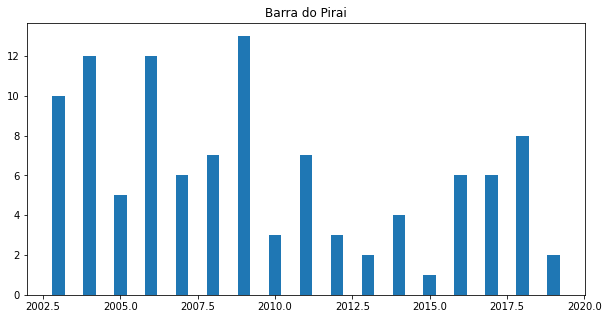

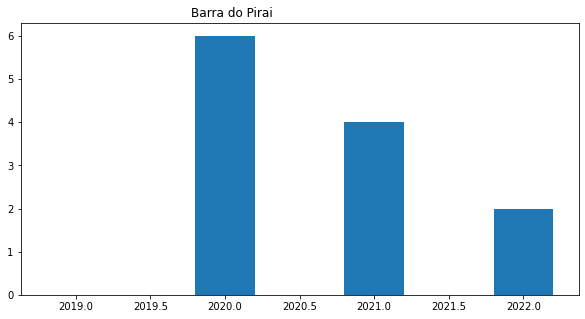

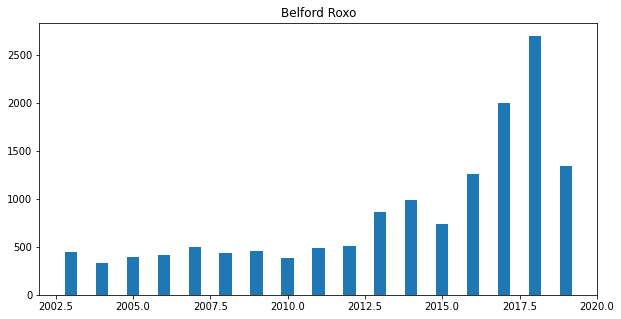

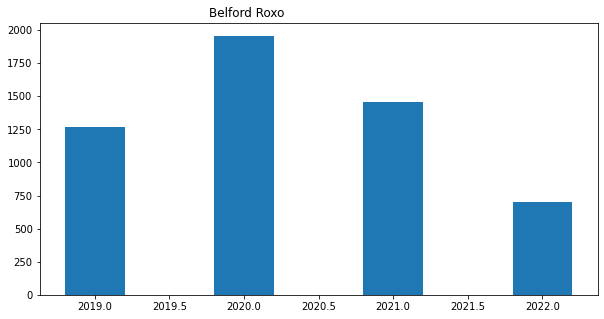

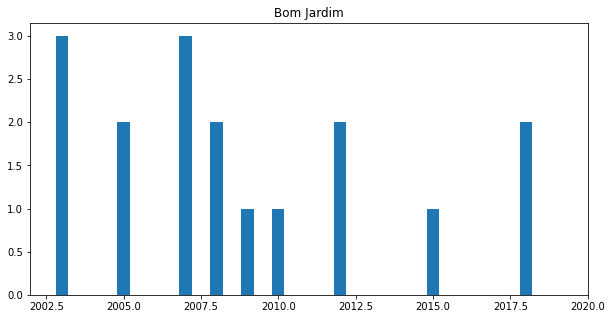

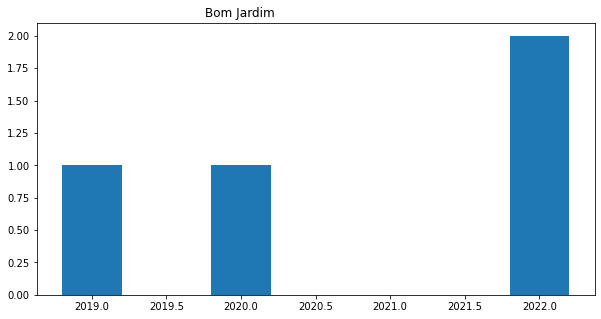

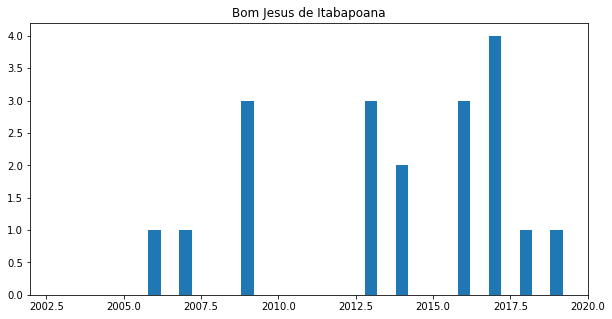

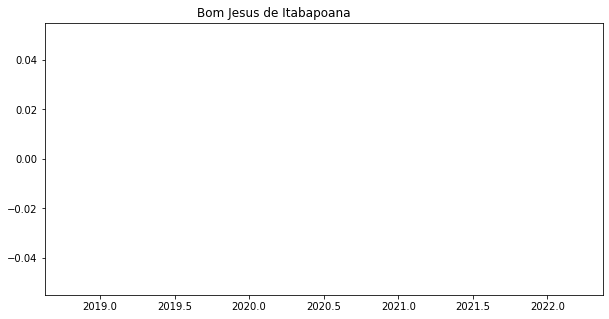

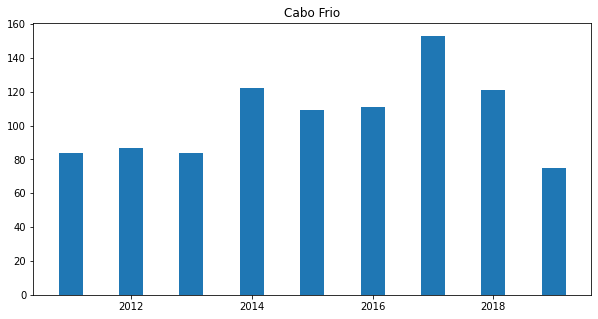

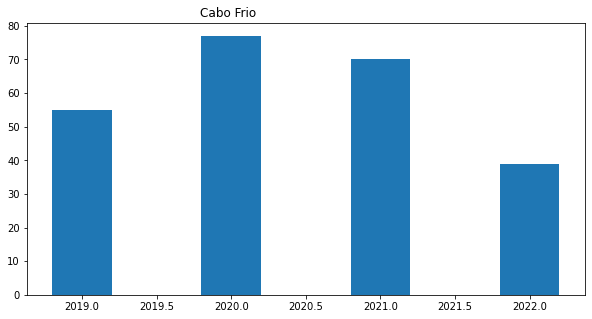

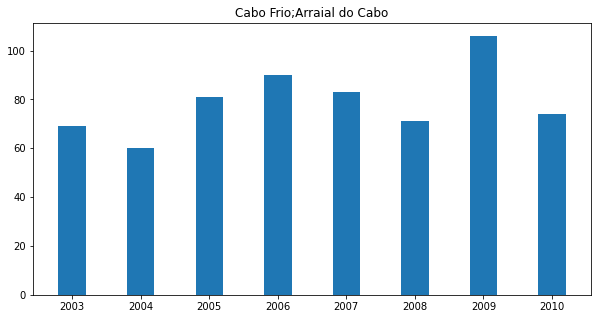

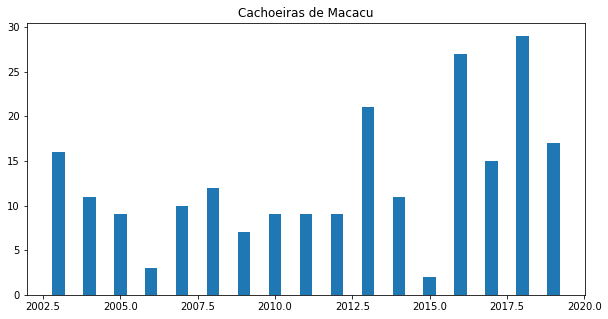

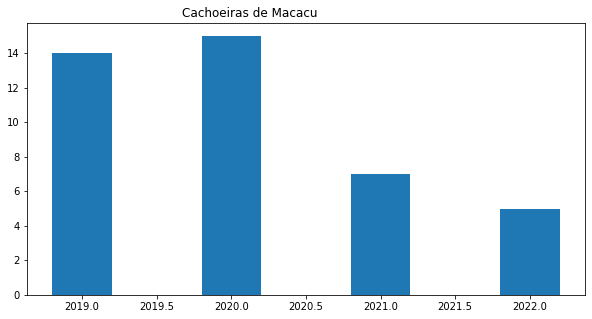

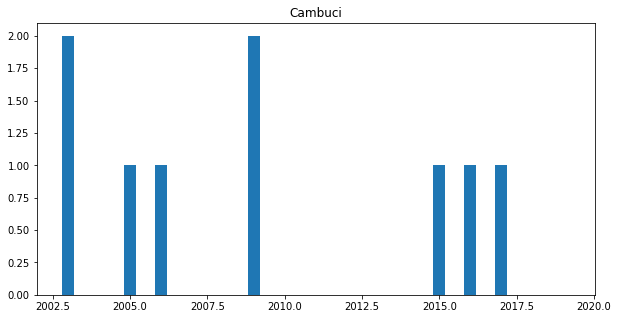

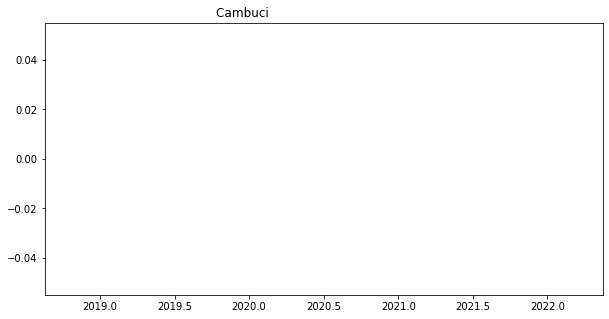

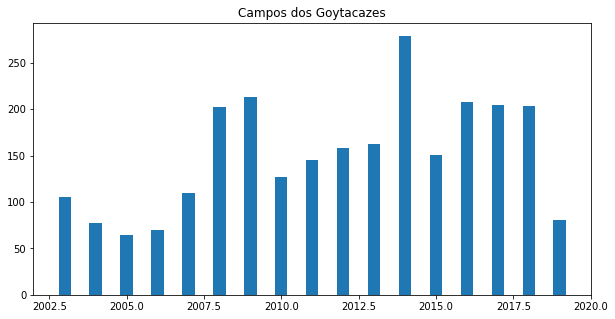

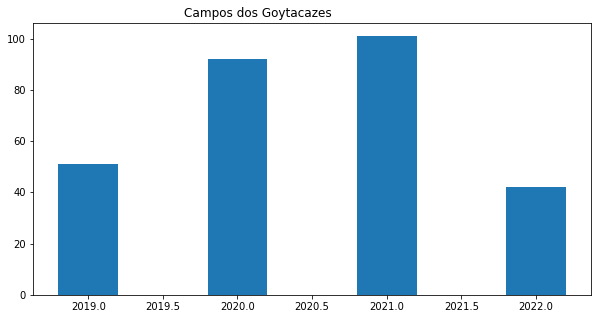

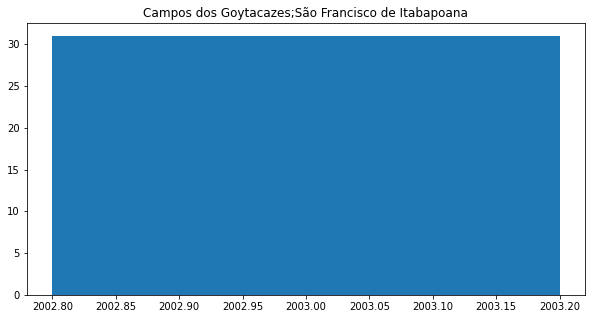

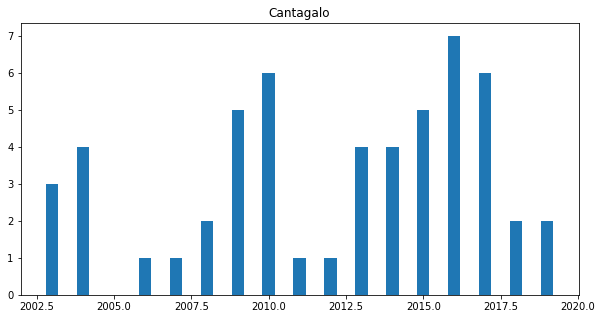

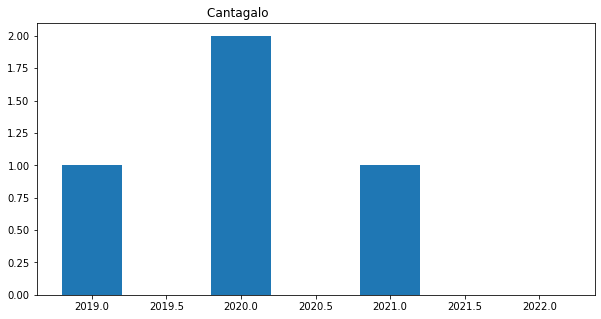

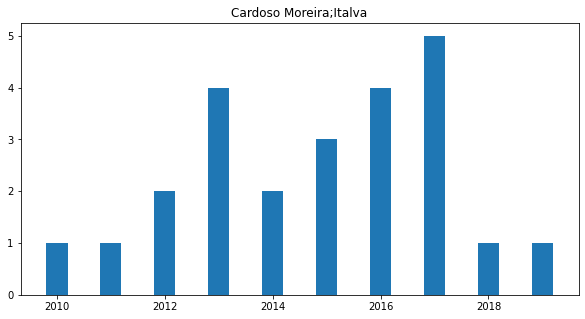

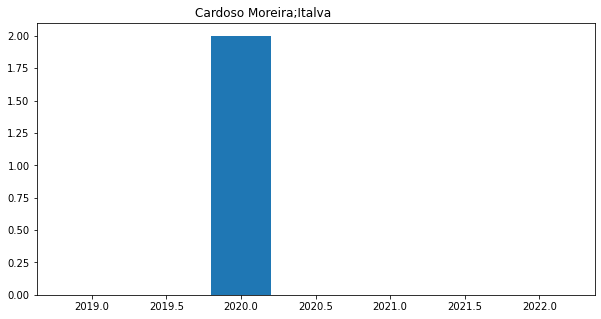

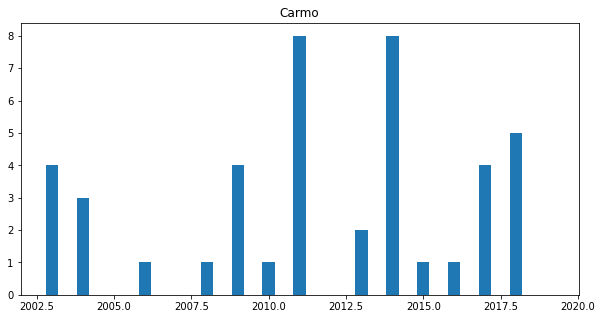

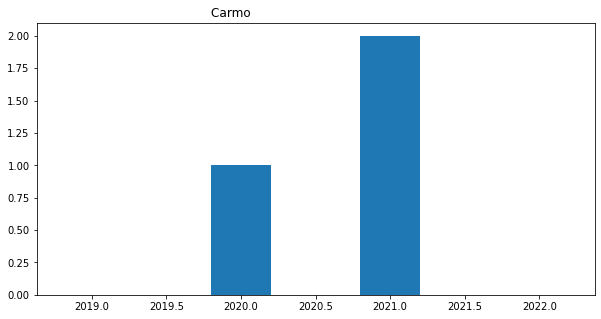

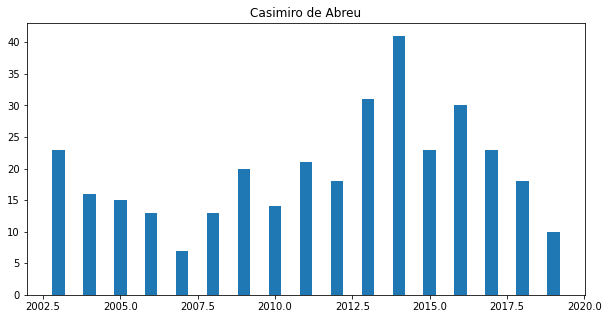

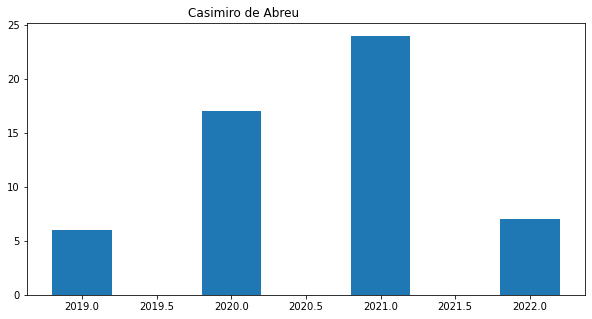

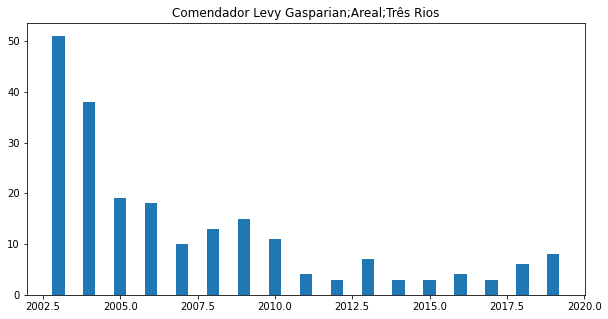

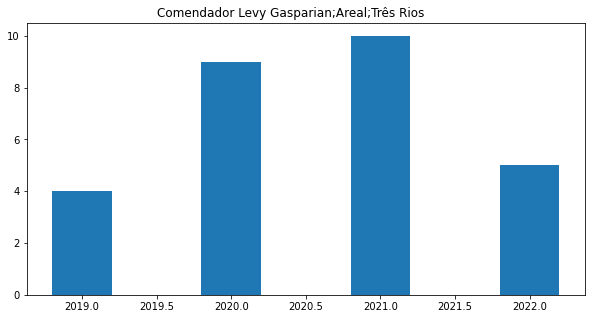

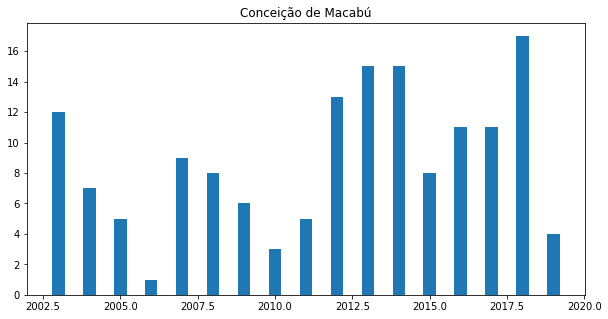

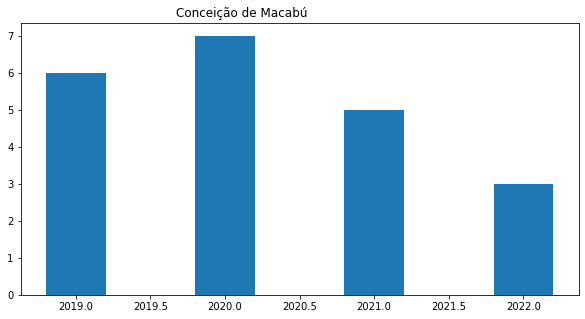

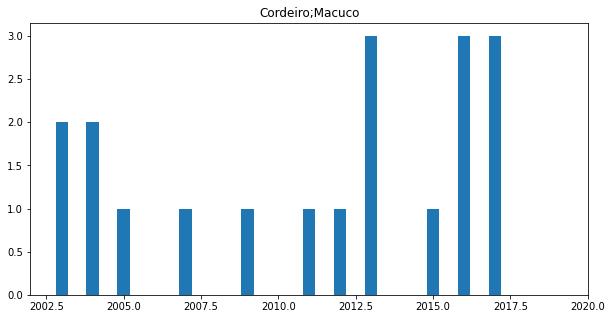

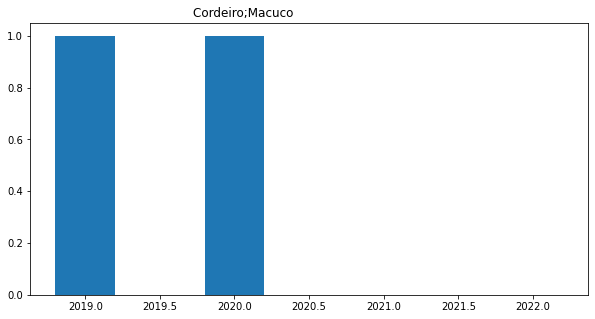

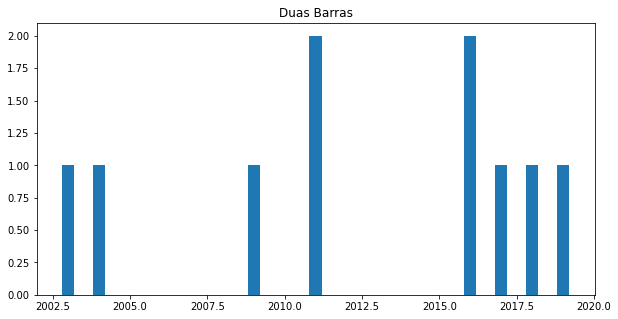

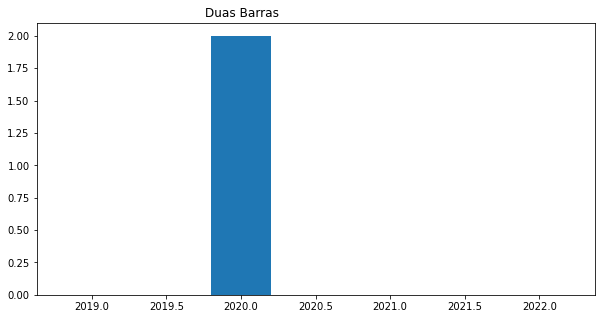

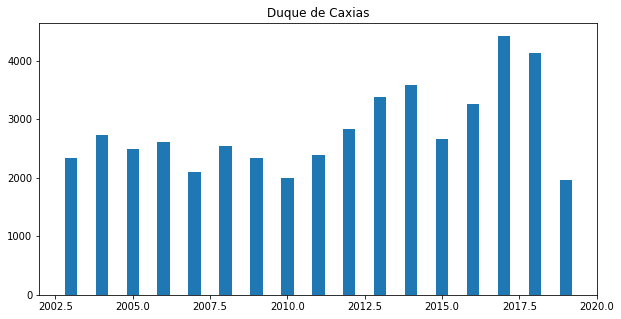

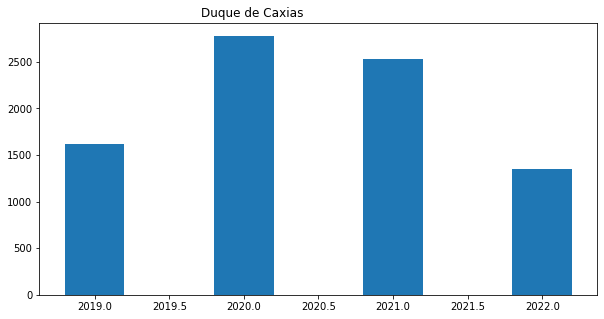

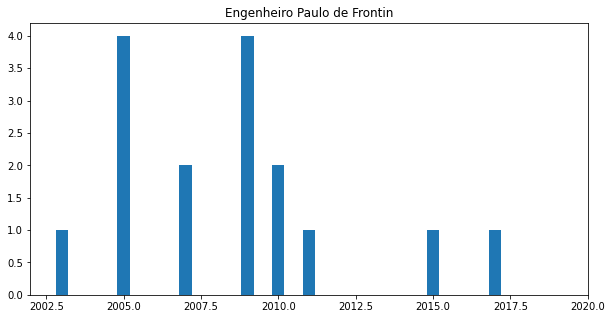

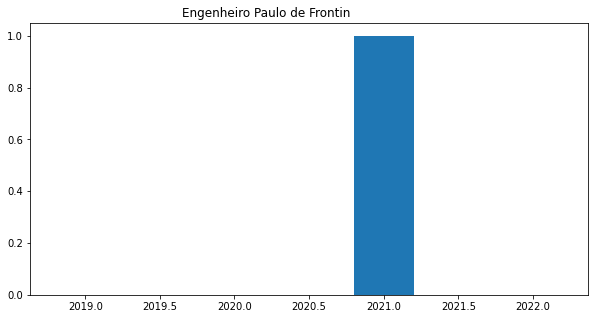

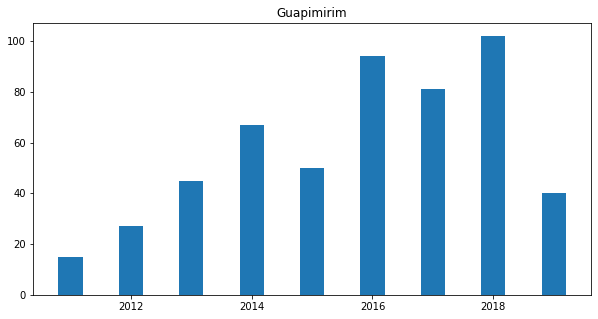

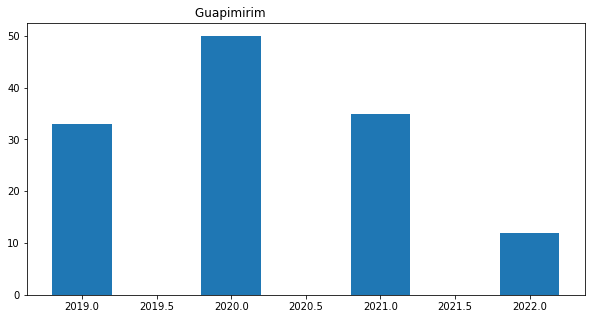

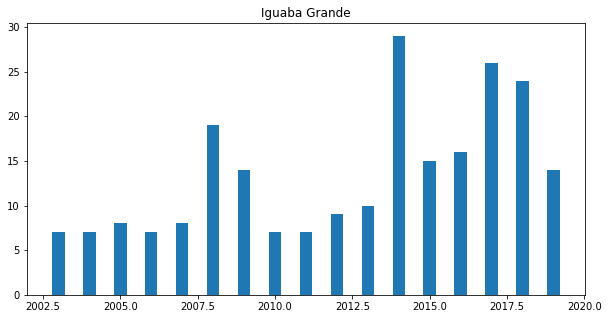

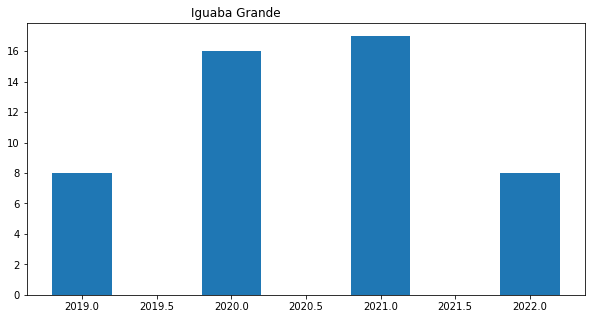

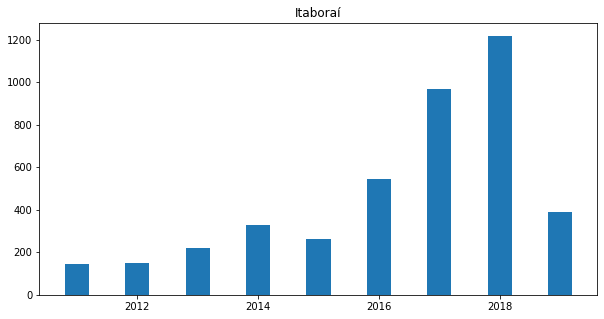

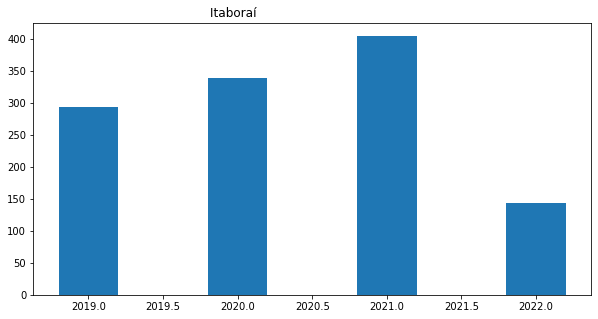

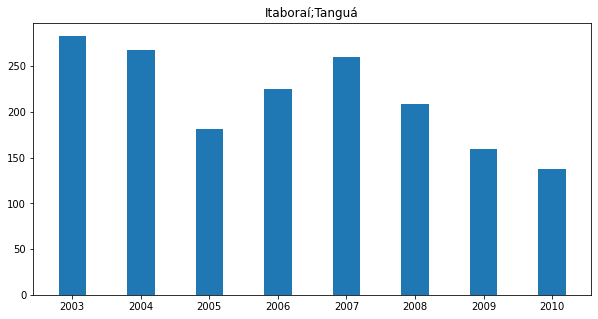

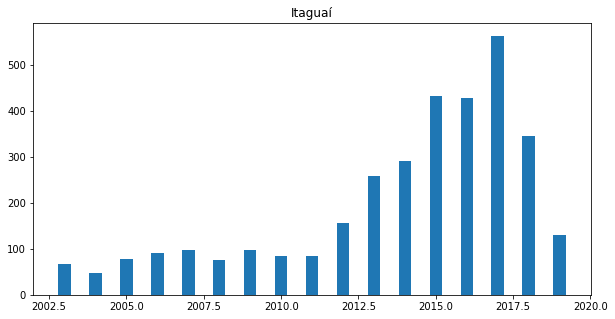

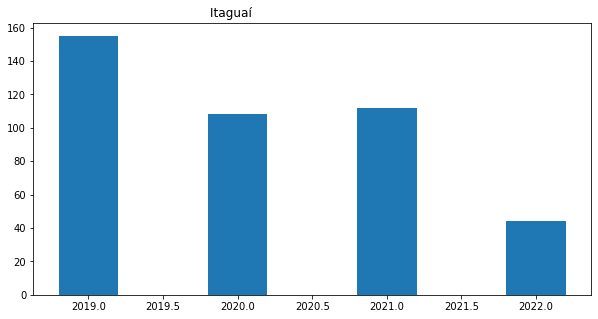

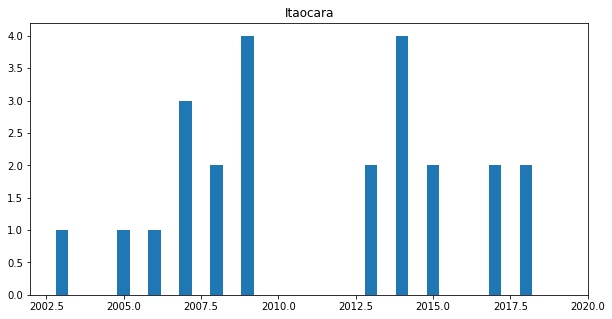

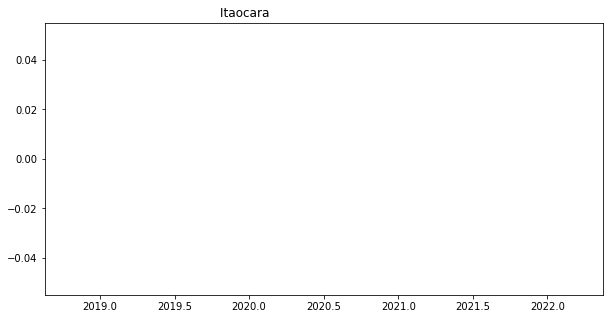

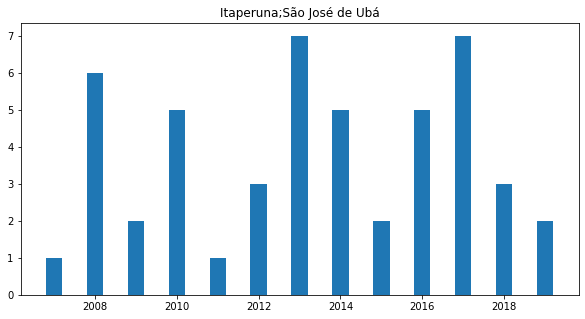

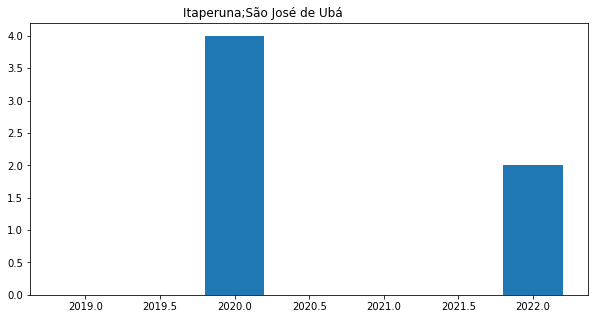

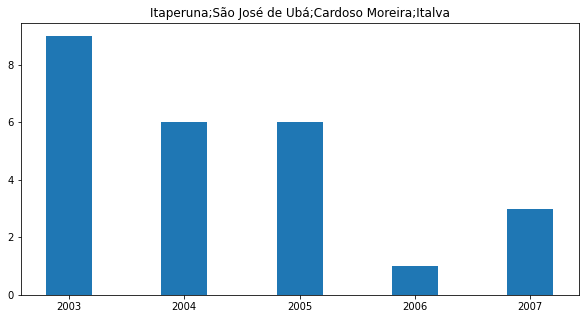

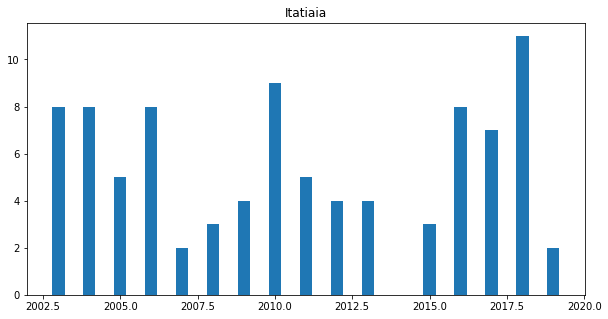

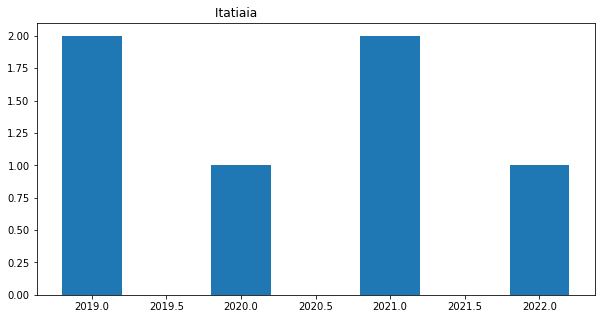

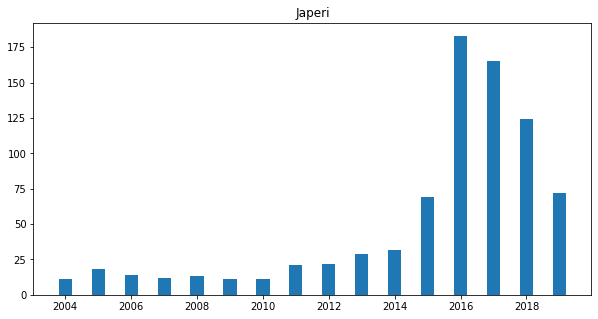

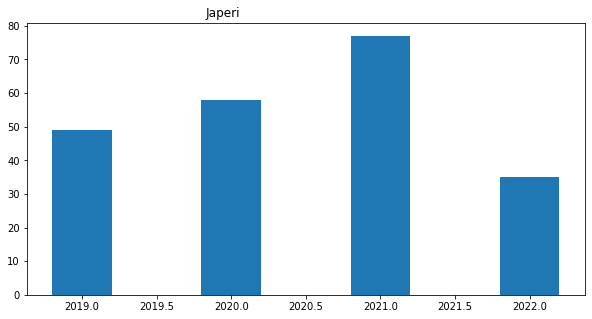

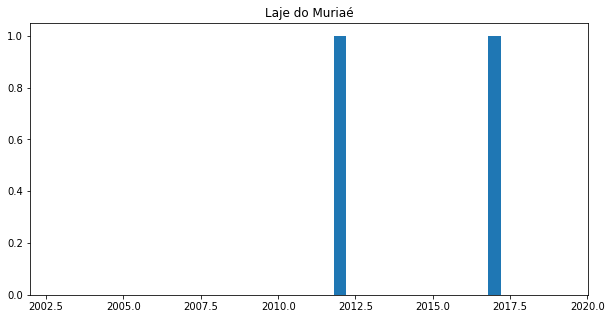

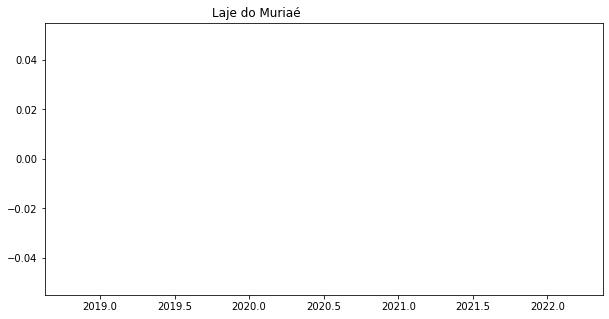

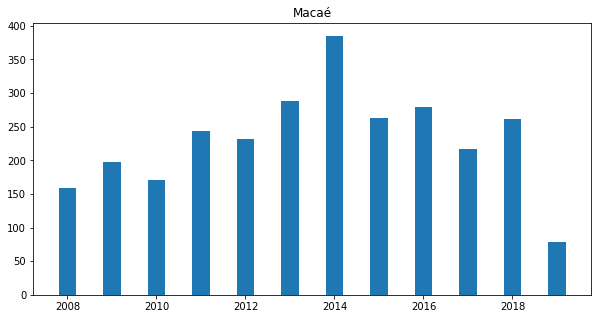

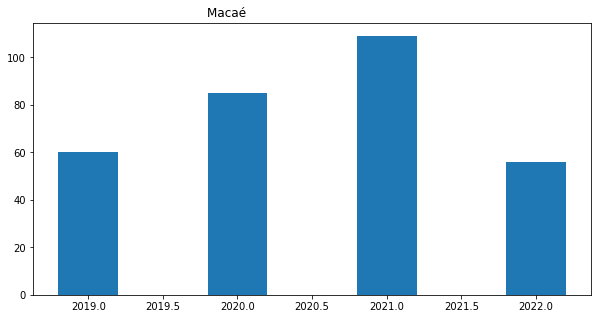

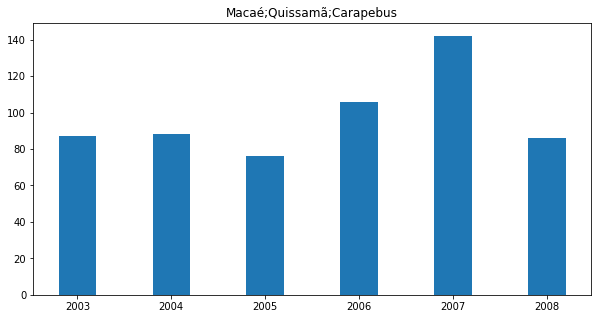

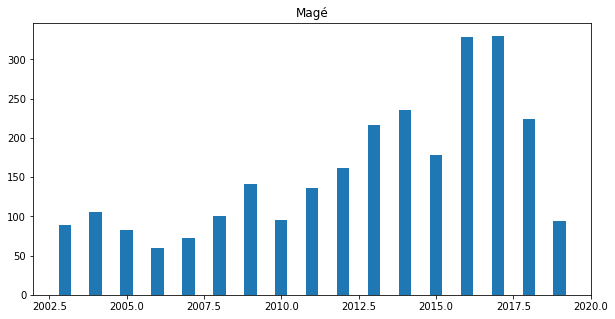

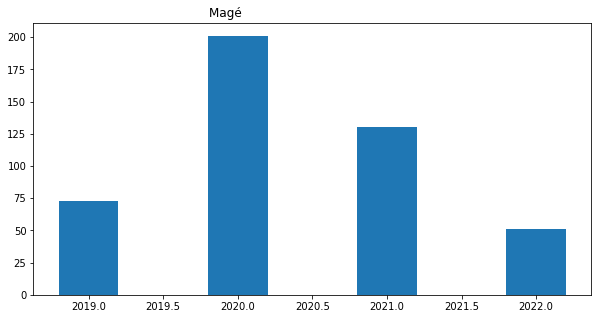

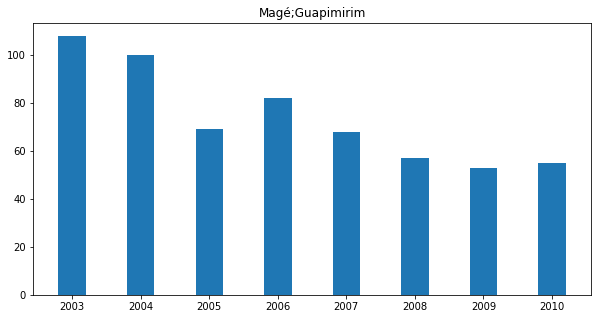

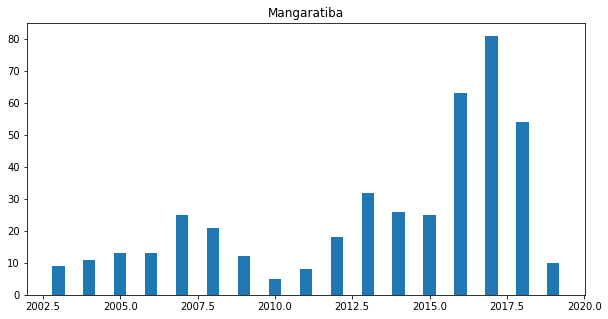

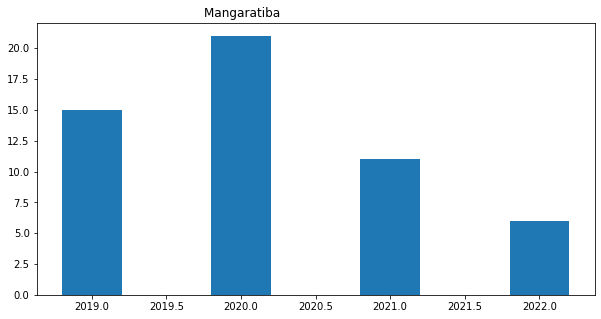

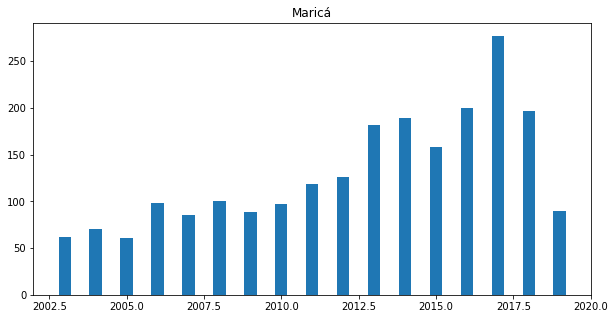

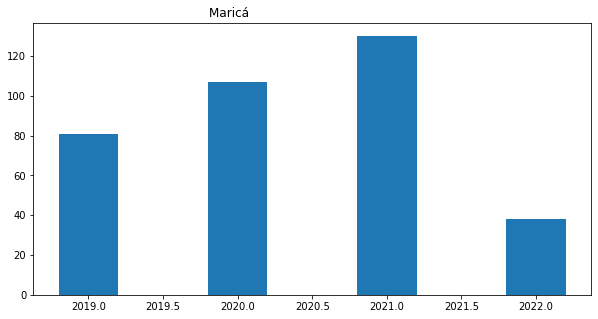

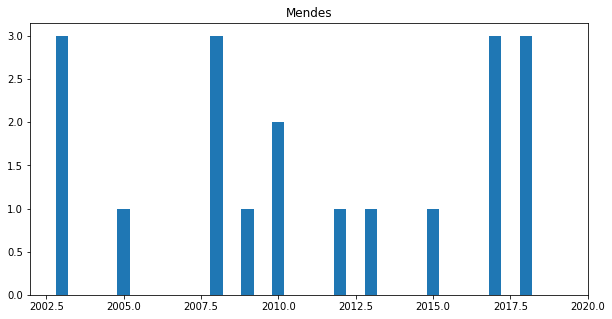

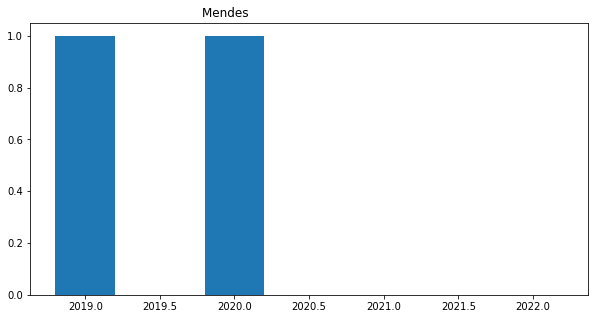

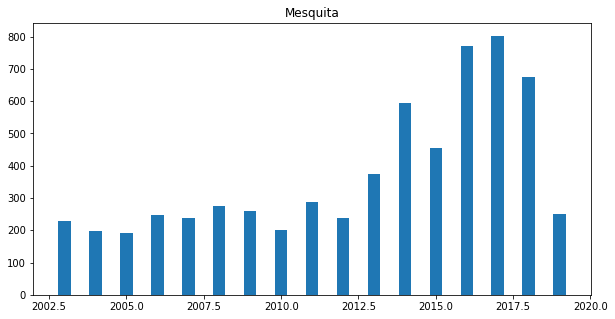

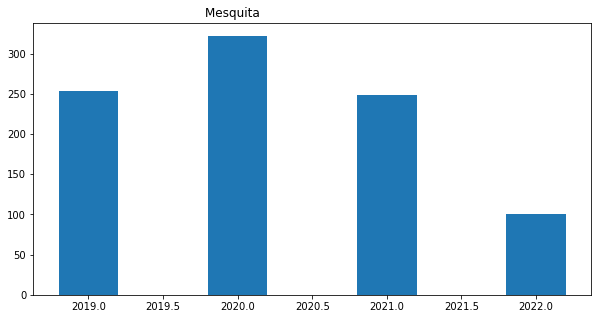

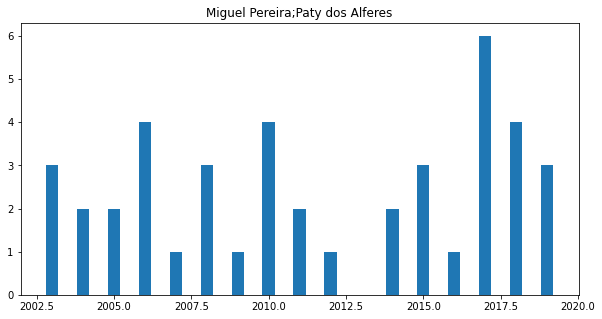

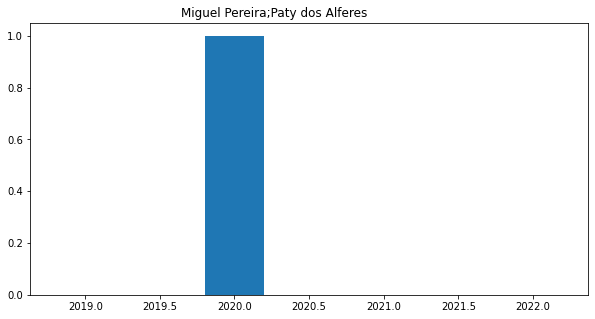

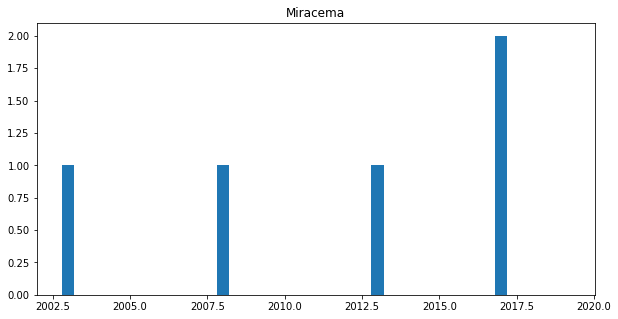

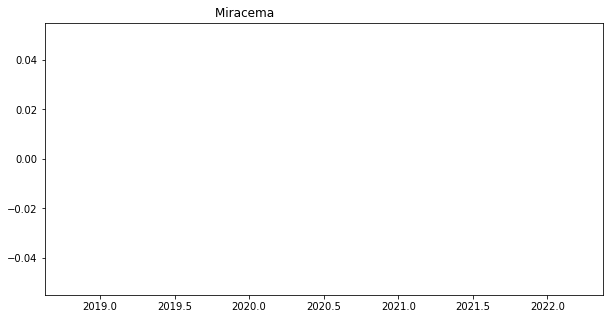

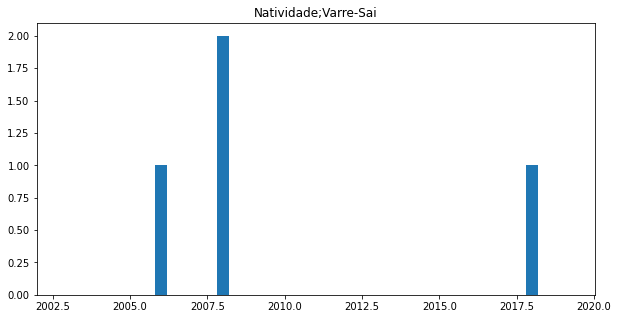

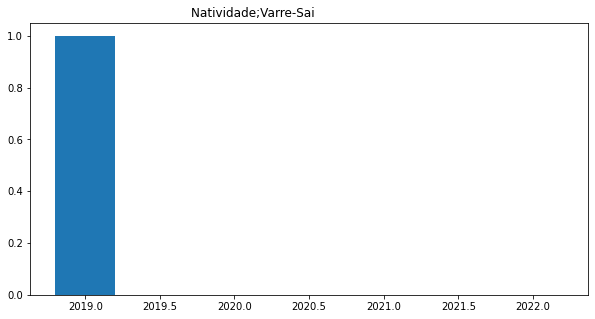

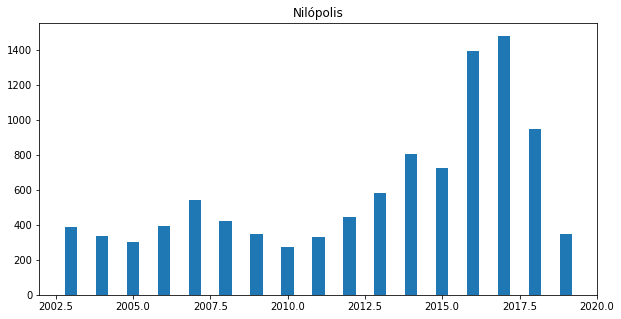

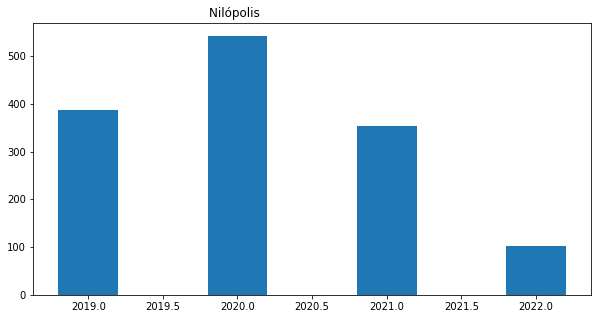

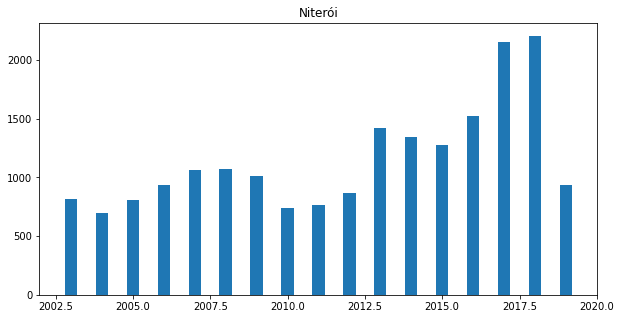

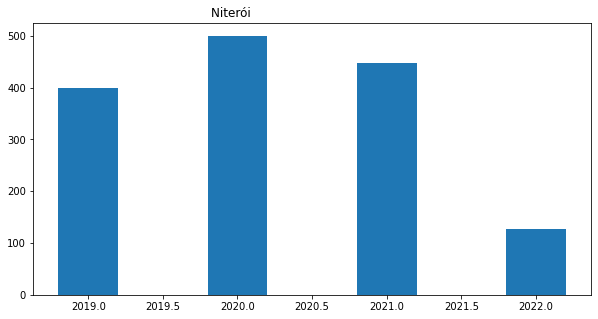

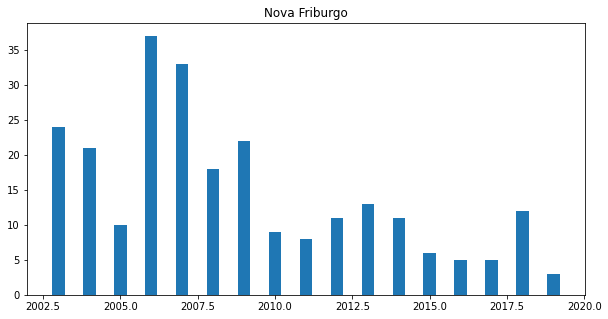

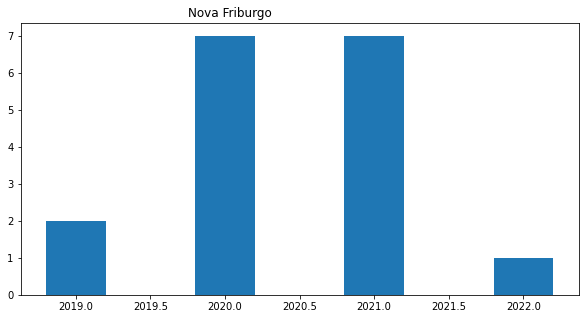

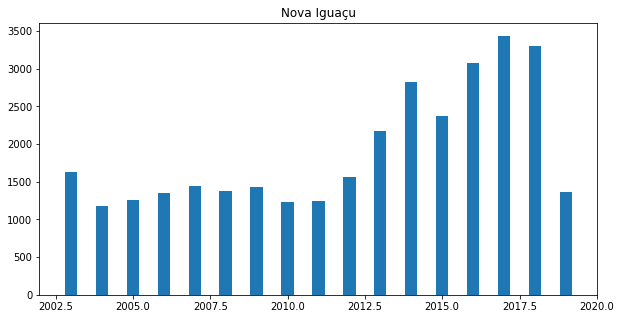

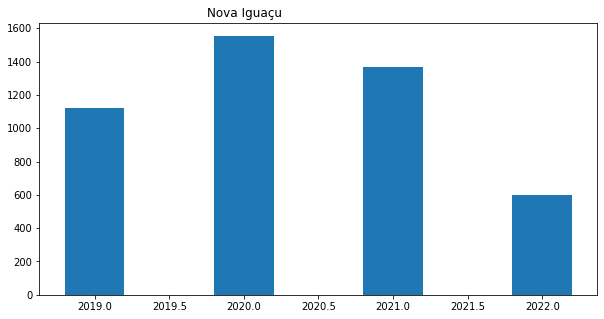

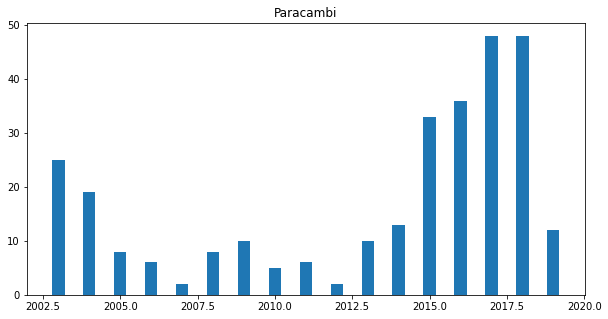

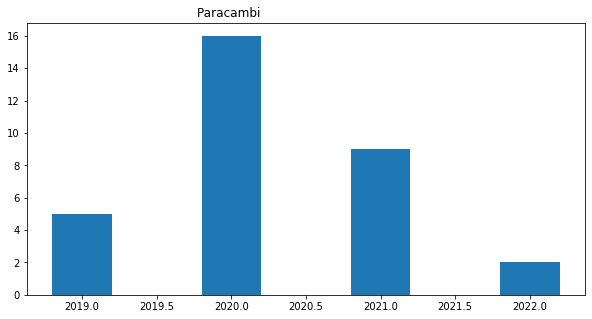

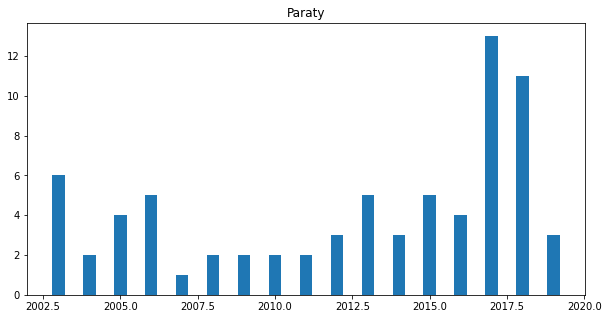

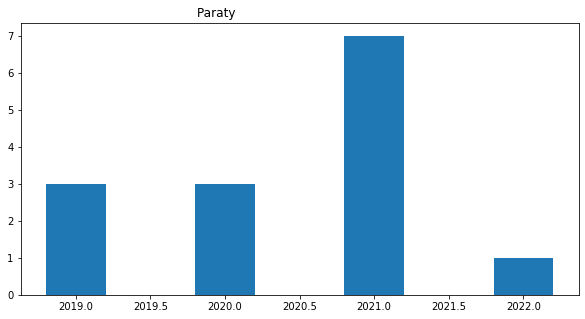

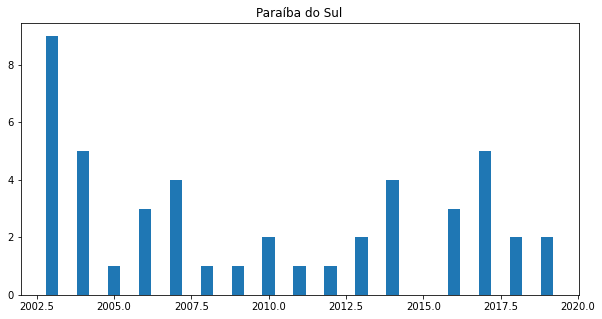

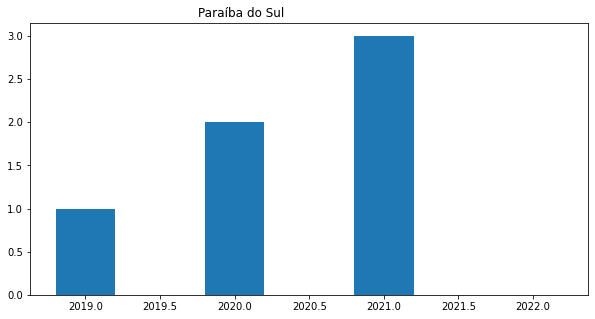

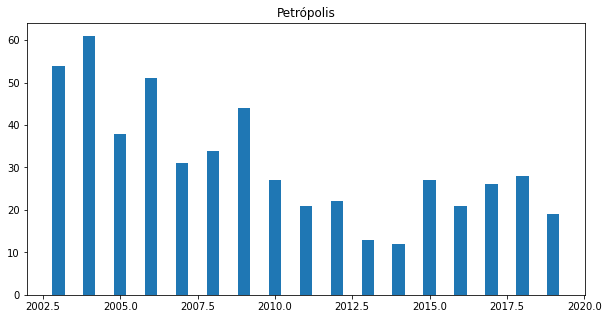

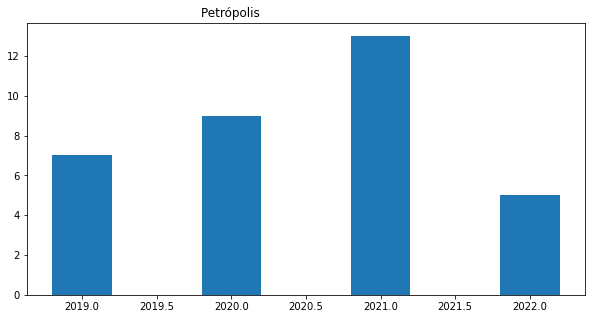

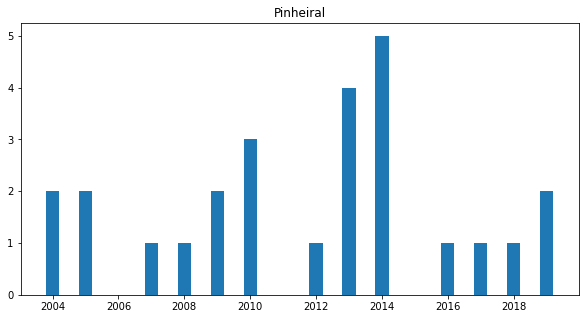

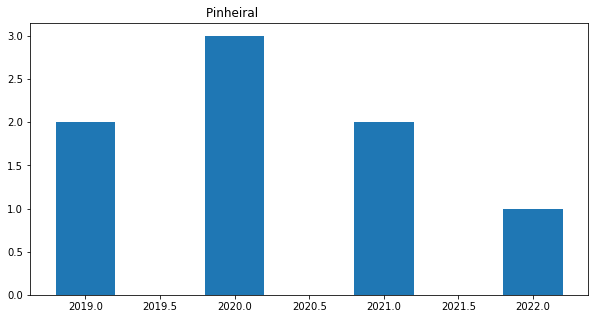

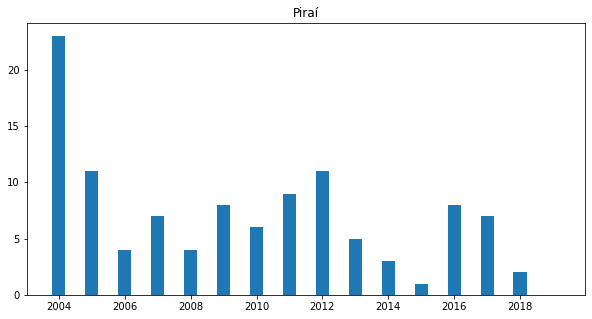

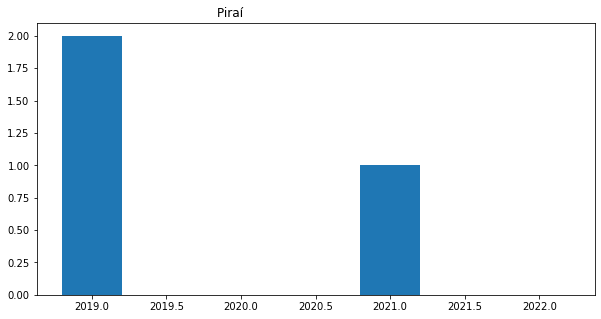

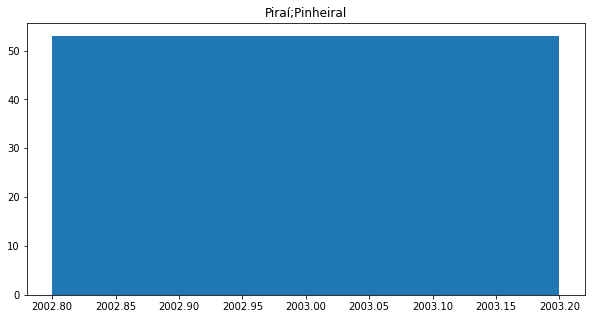

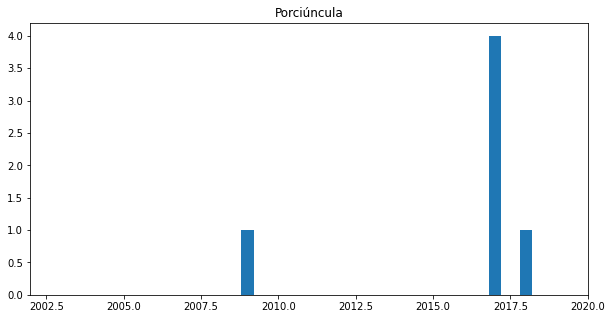

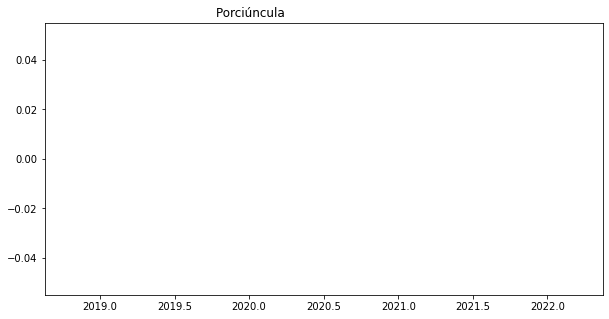

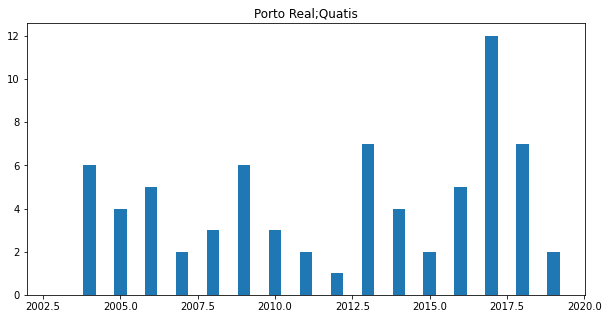

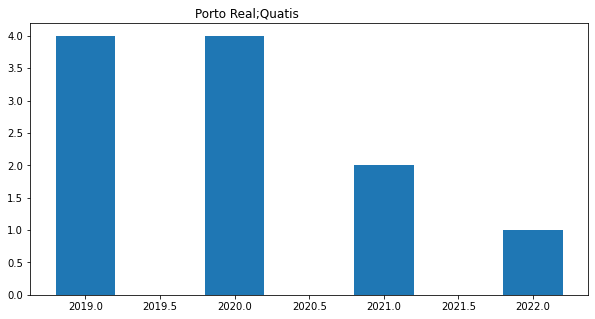

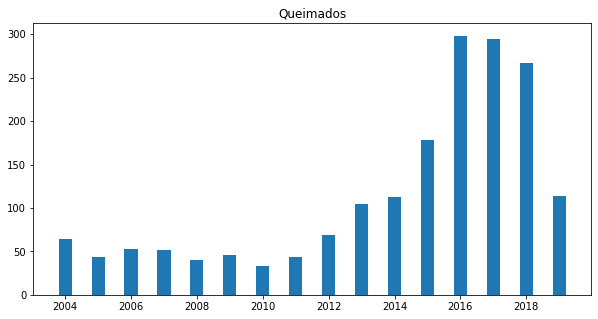

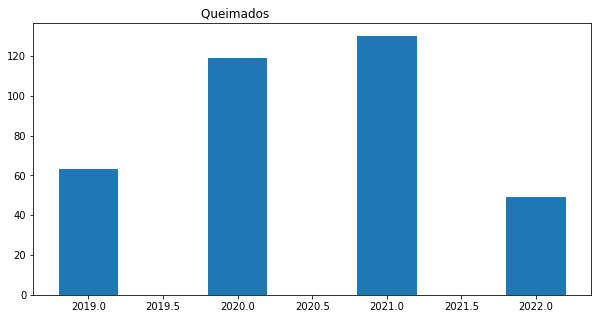

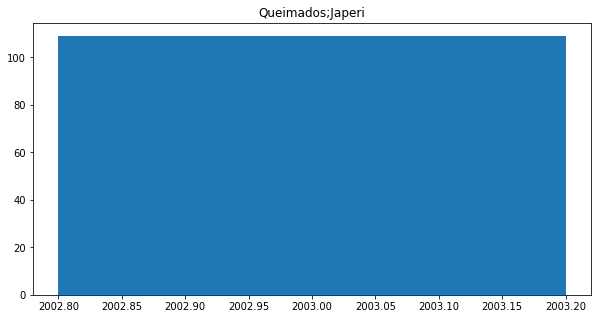

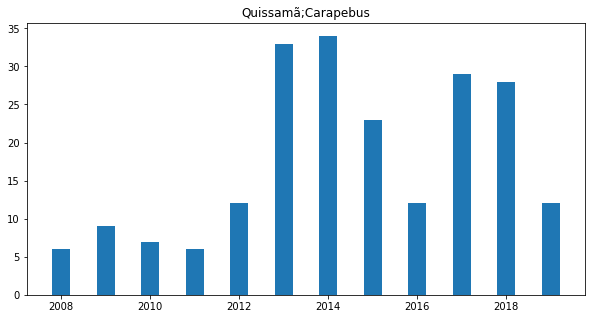

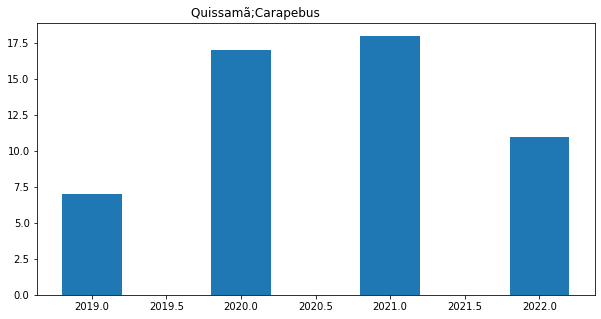

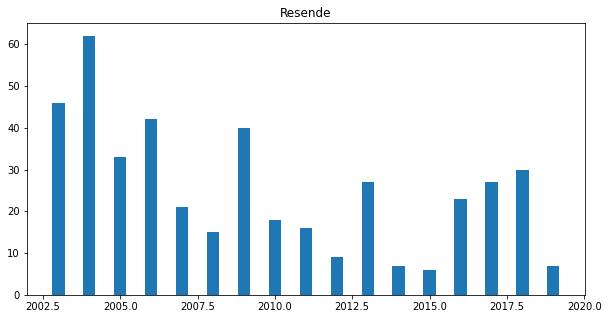

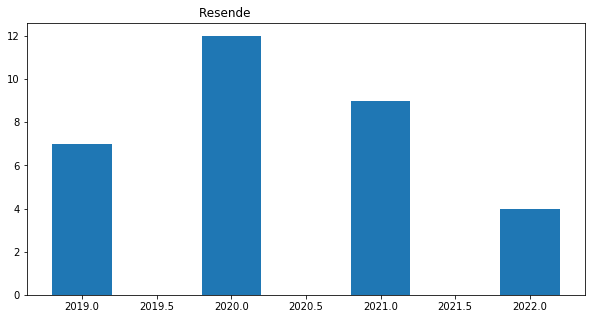

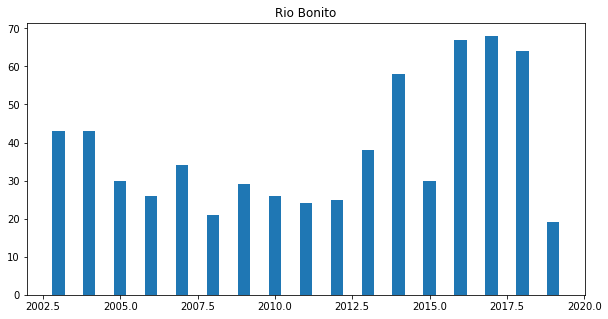

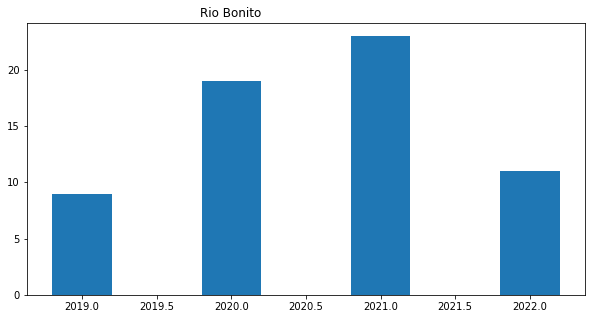

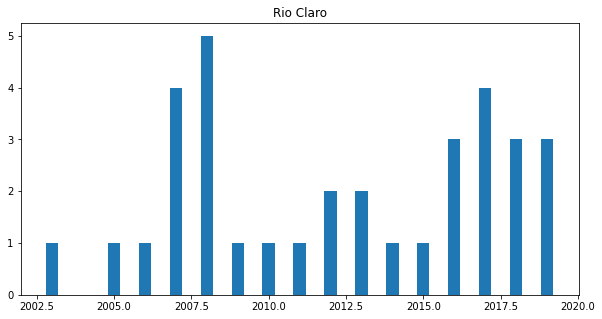

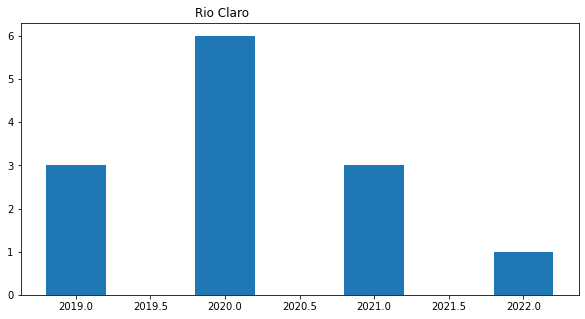

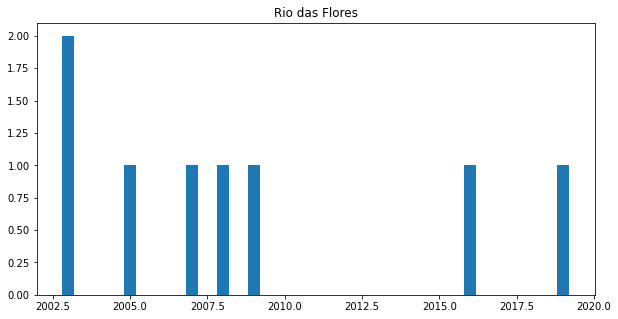

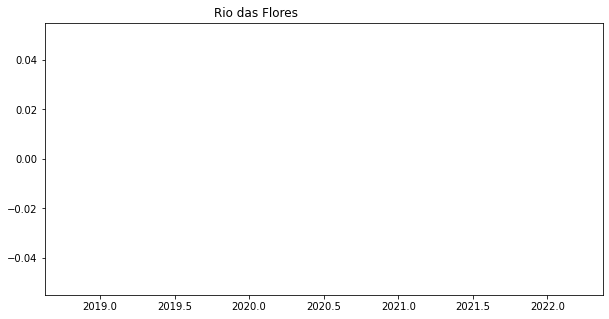

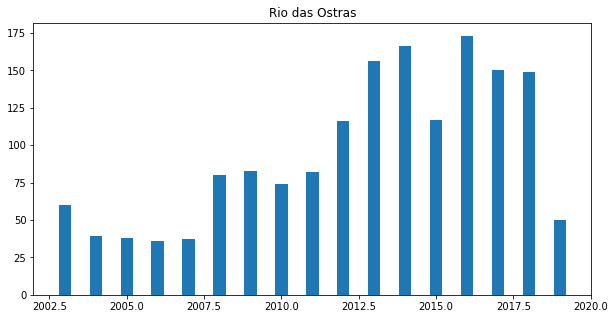

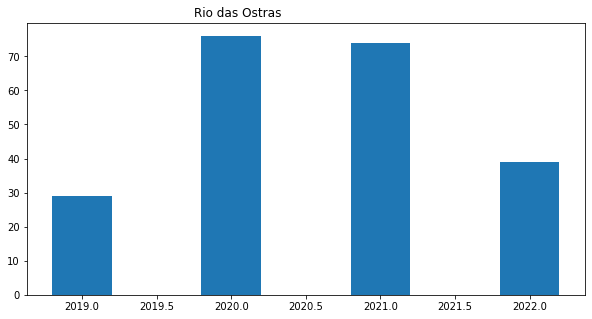

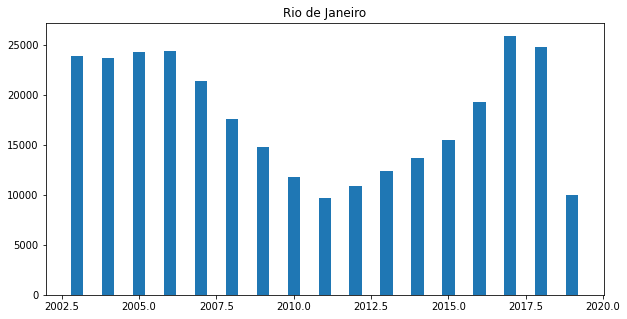

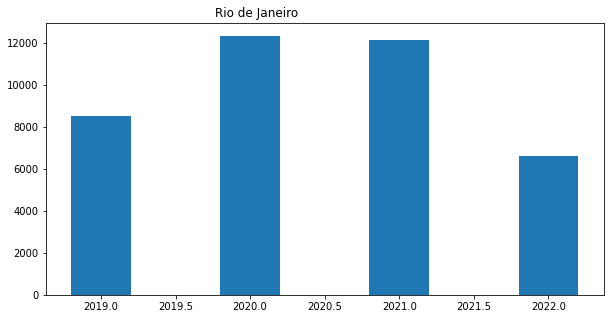

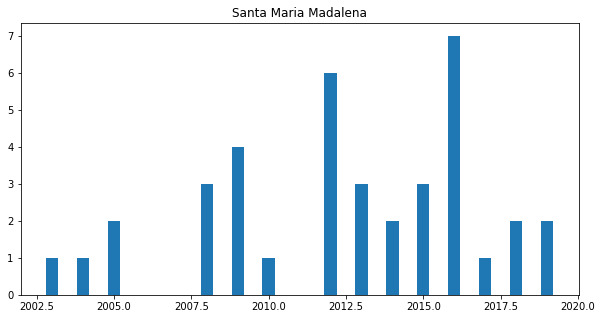

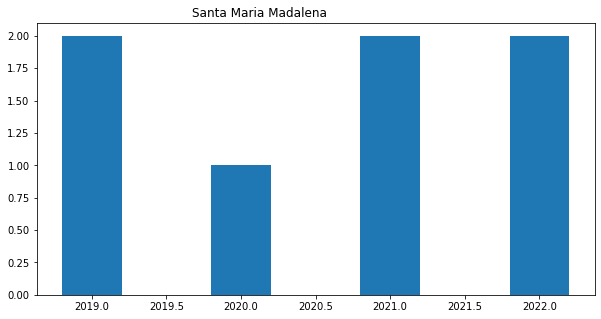

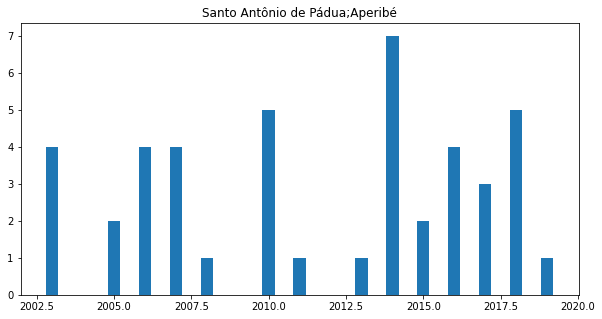

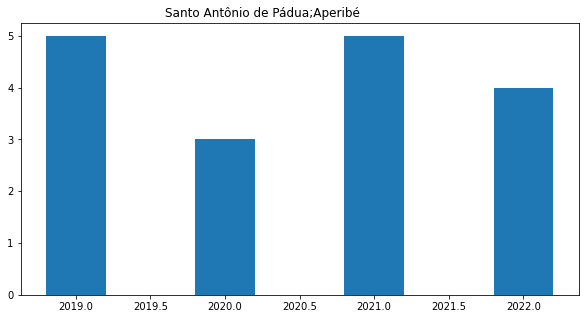

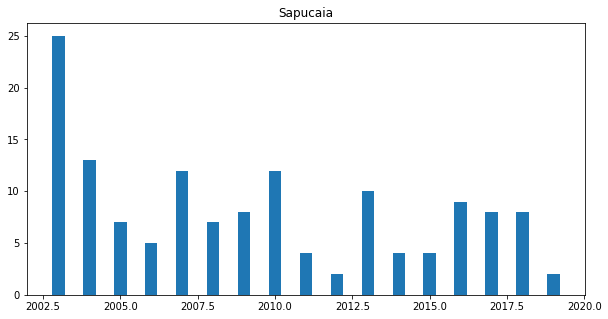

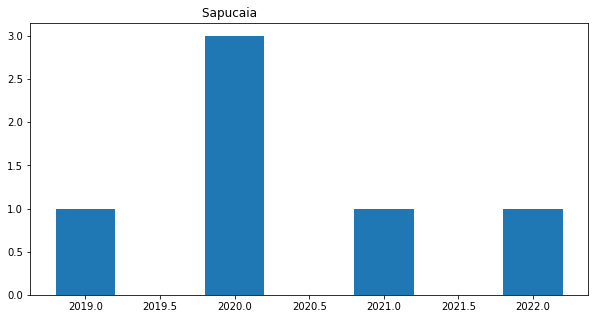

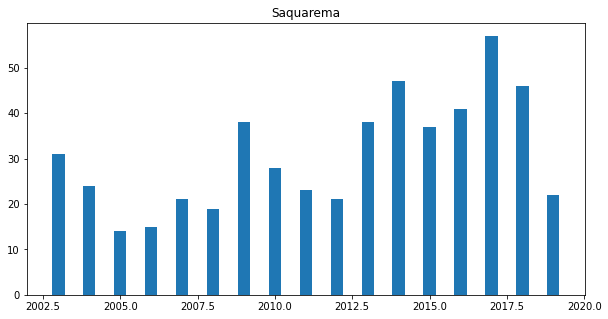

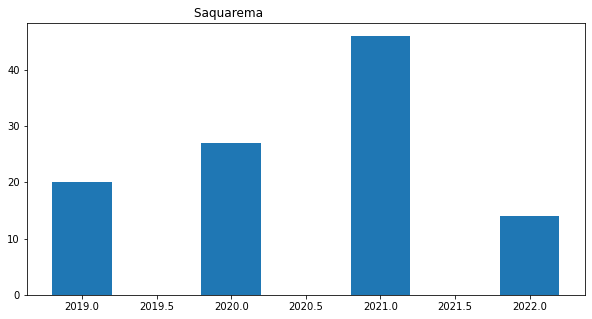

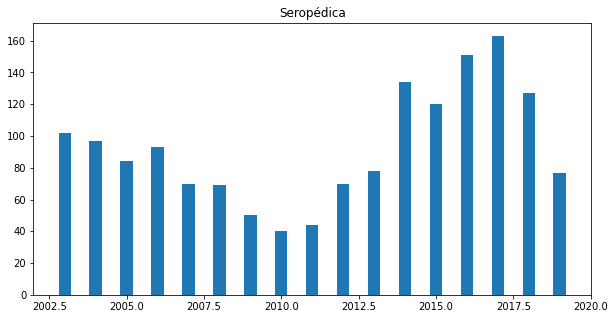

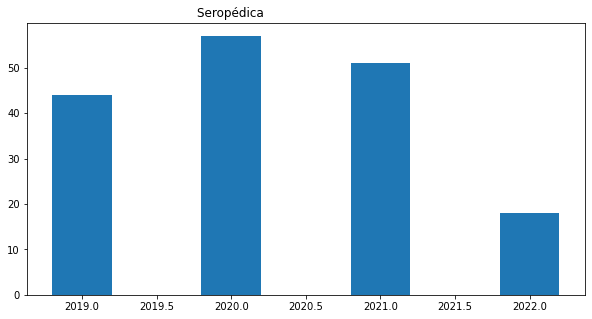

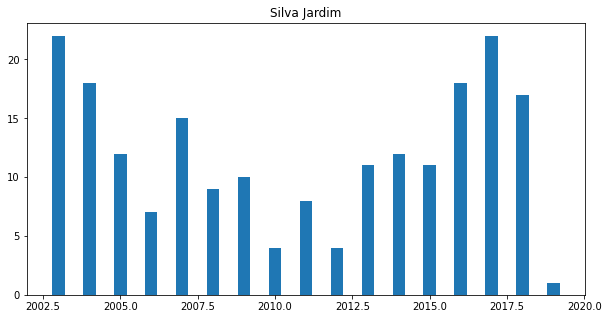

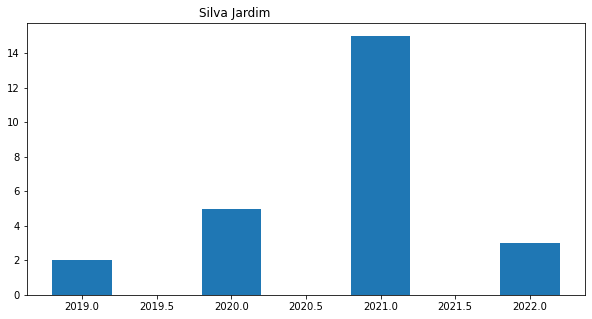

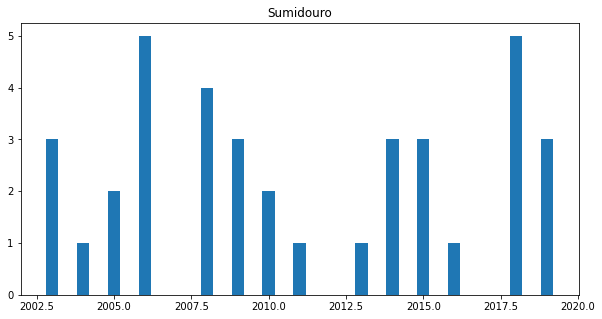

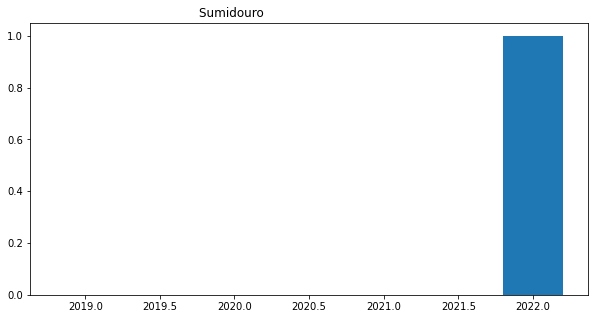

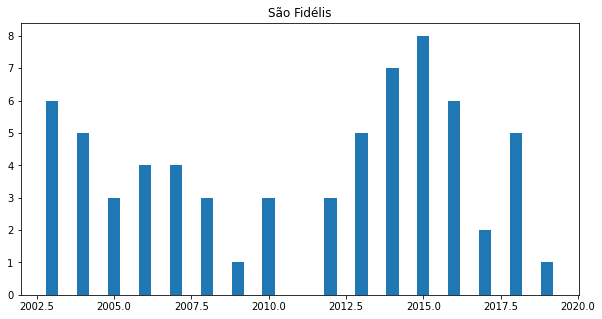

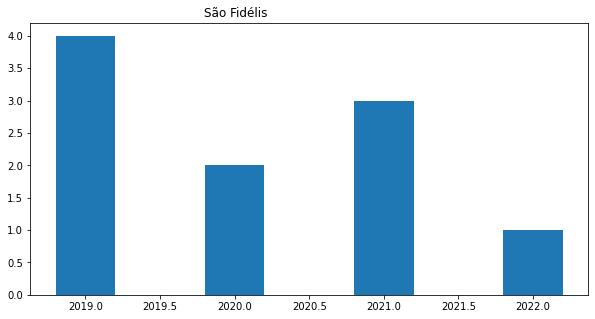

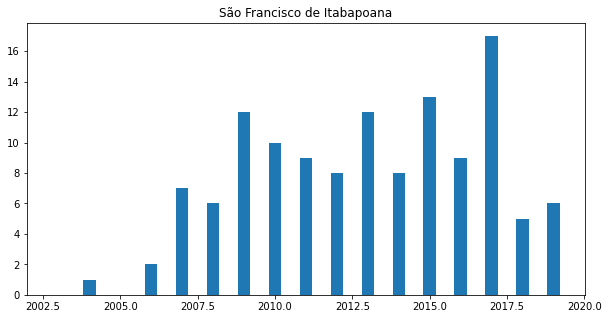

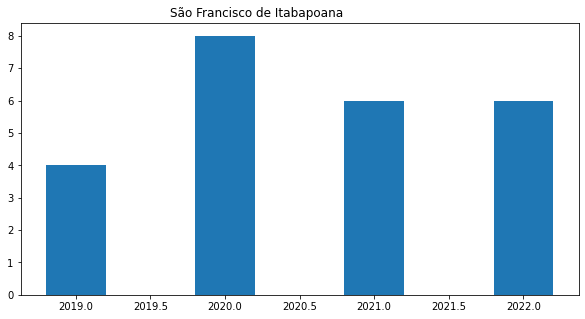

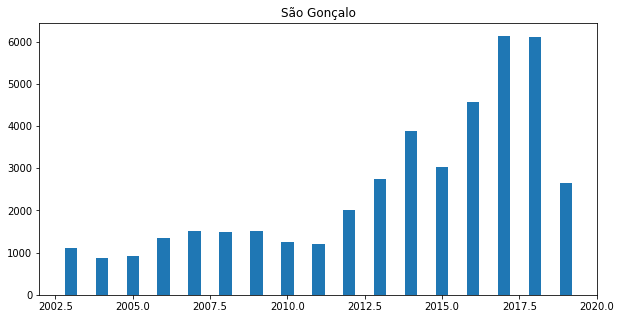

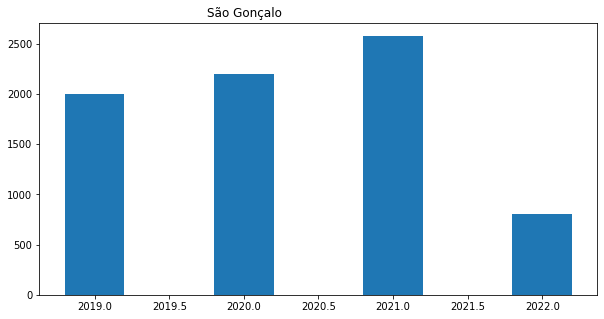

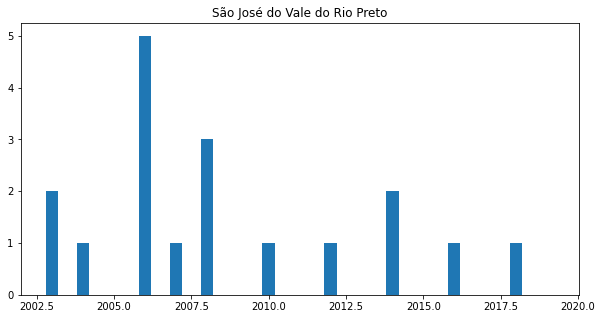

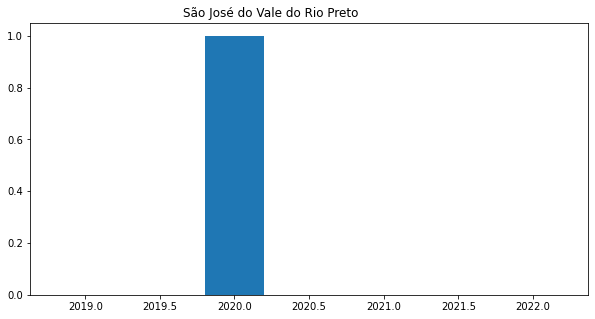

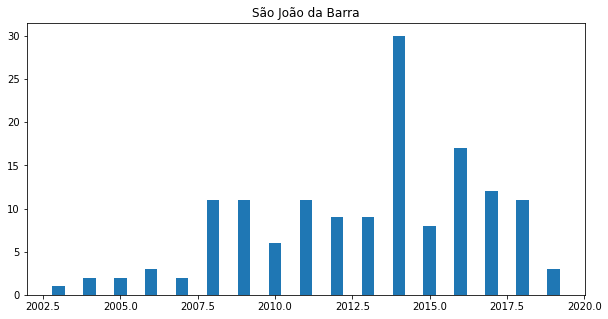

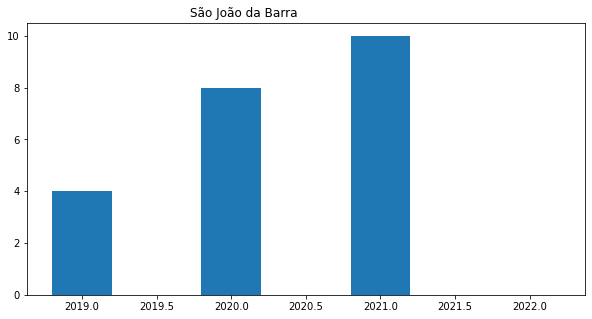

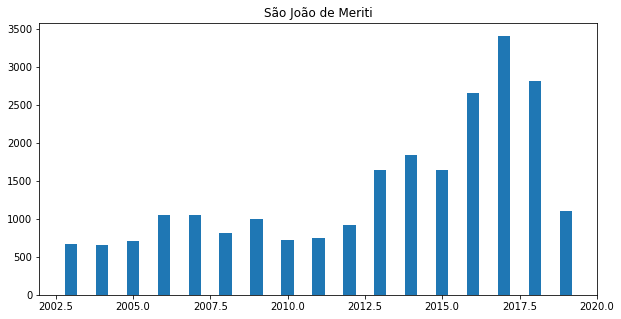

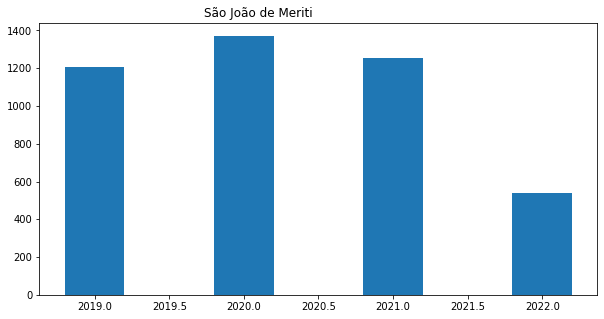

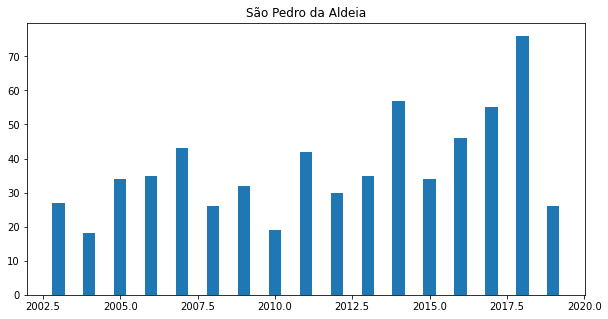

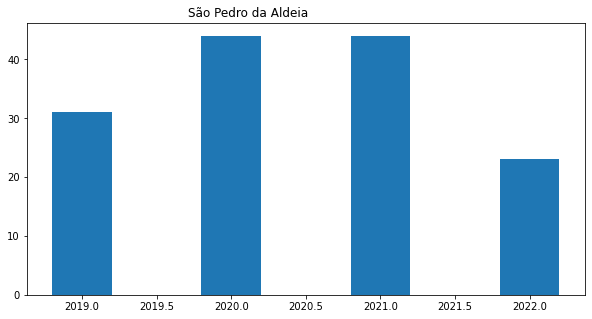

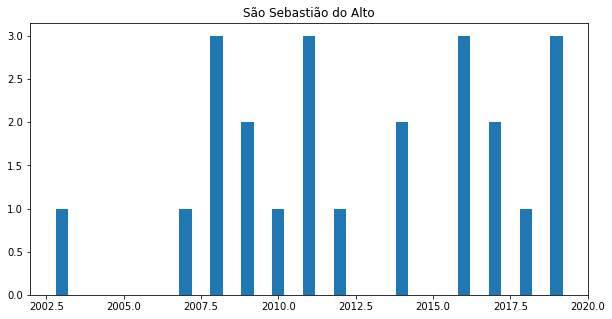

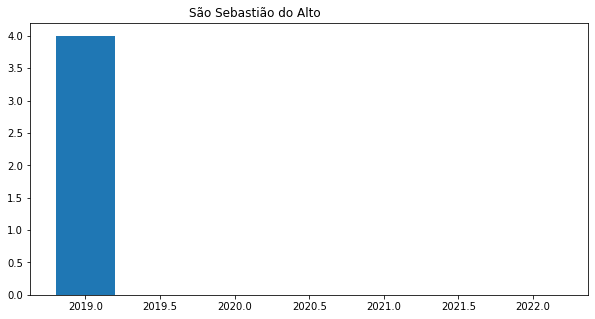

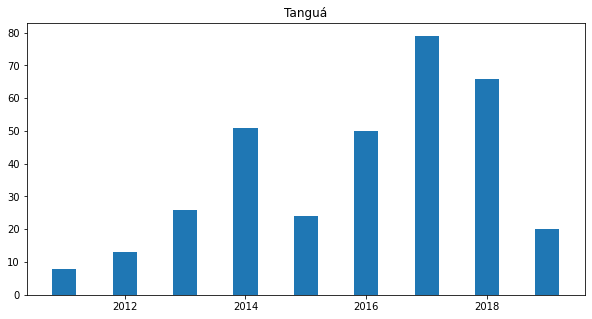

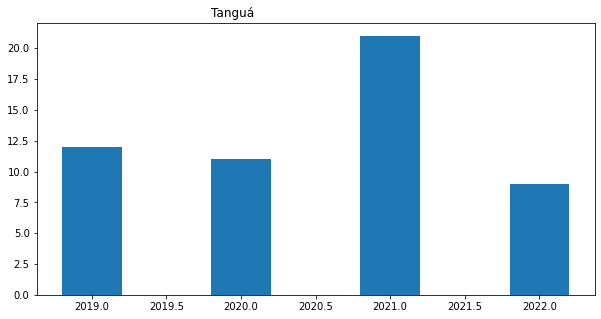

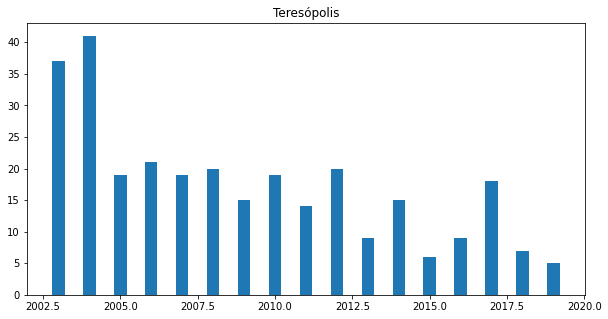

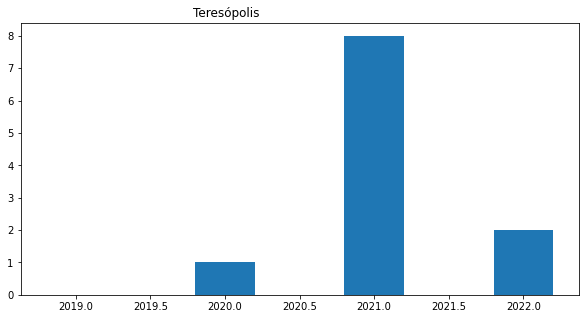

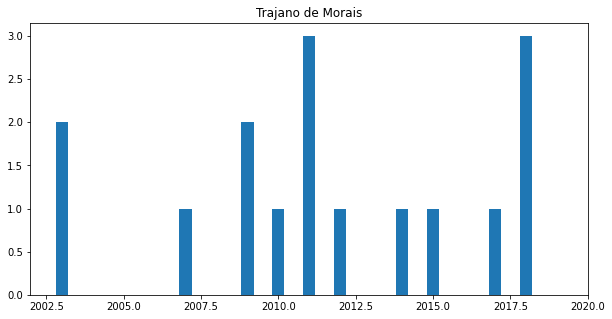

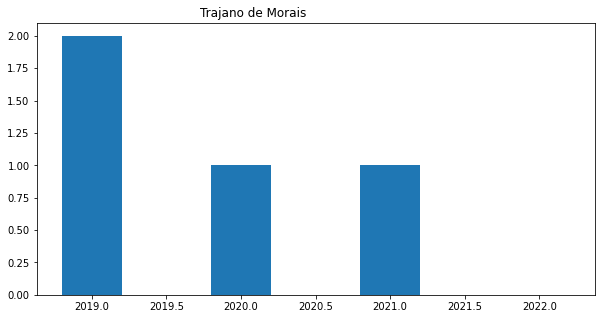

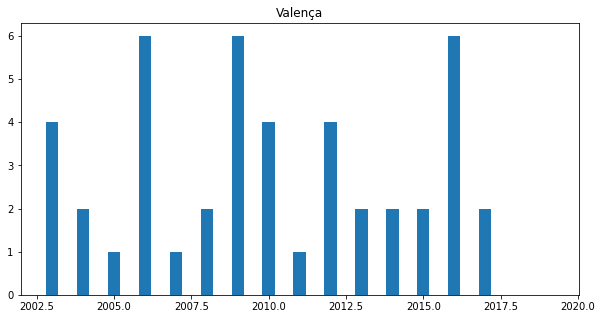

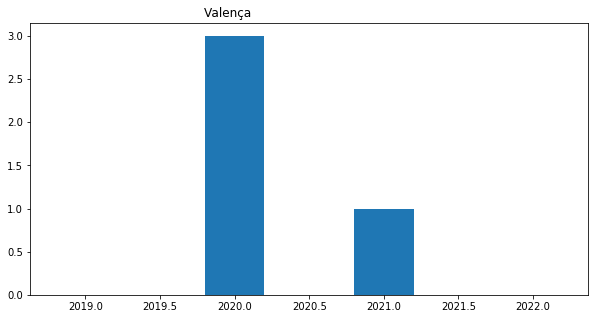

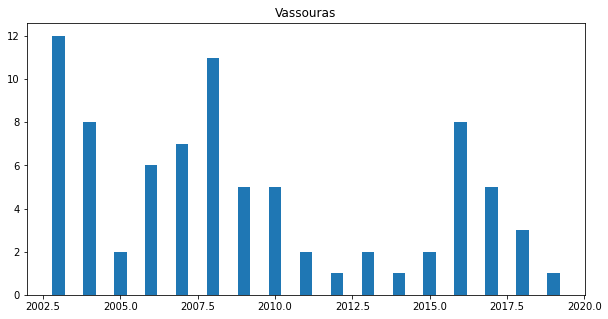

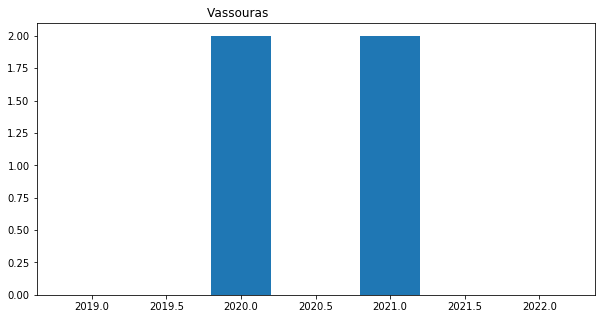

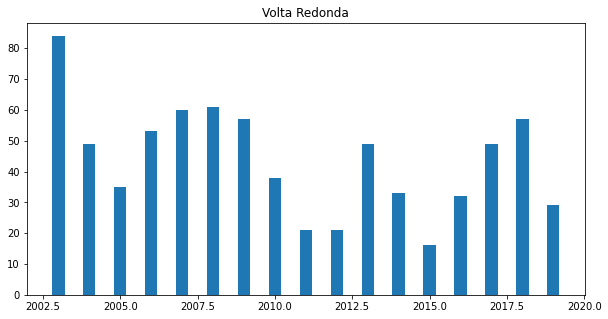

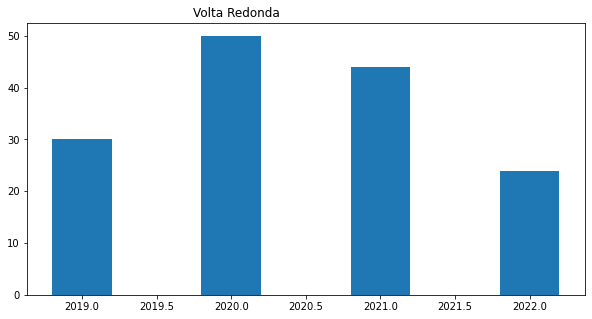

In [ ]:
help = aux1.munic.unique()

for i in help:
    fig = plt.figure(figsize = (10, 5))
    plt.title(i)
    plt.bar(aux1[aux1.munic == i].ano, aux1[aux1.munic == i].roubo_veiculo, width = 0.4)
    plt.show()

Analisando os homicidios dolosos, assim no caso dos veículos, há uma queda na quantidade. Vale ressaltar que os dados do ano de 2022 são até julho.

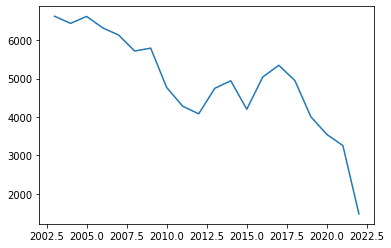

In [64]:
plt.plot(df.groupby('ano').sum().hom_doloso)

Furto de celulares ao longo dos anos

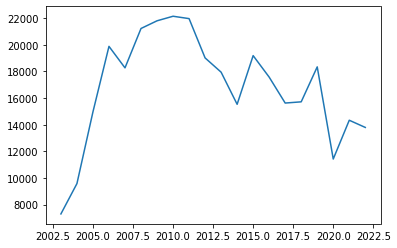

In [80]:
plt.plot(df.groupby('ano').sum().furto_celular)

Registro de ocorrências ao longo dos anos.

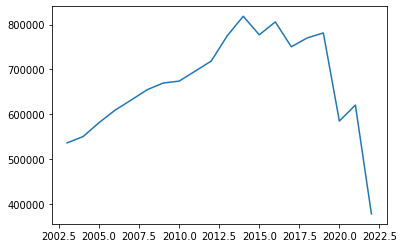

In [91]:
plt.plot(df.groupby('ano').sum().registro_ocorrencias)

#Análise de correlações

In [76]:
corr = df.corr()
corr

,CISP,mes,ano,AISP,RISP,mcirc,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,apreensao_drogas,recuperacao_veiculos,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
CISP,1.000000,0.000266,0.000601,0.357042,0.895364,0.234755,-0.213155,-0.073135,-0.122736,-0.220577,...,-0.012322,-0.383618,-0.282102,-0.335620,-0.095170,-0.008065,-0.081650,-0.032472,-0.574378,-0.000099
mes,0.000266,1.000000,-0.039651,0.001287,0.000711,0.000508,-0.022968,-0.001255,-0.002125,-0.022601,...,0.001126,-0.019942,-0.005677,-0.001992,-0.034889,0.001886,0.001270,0.000677,-0.003272,0.047514
ano,0.000601,-0.039651,1.000000,0.066661,-0.003112,-0.037265,-0.142888,-0.016406,-0.048013,-0.143797,...,0.184757,-0.034427,-0.095220,-0.024376,-0.166725,-0.014133,-0.025580,-0.014880,0.056875,-0.197119
AISP,0.357042,0.001287,0.066661,1.000000,0.344095,0.190917,0.019492,-0.009613,-0.039979,0.015329,...,0.039848,-0.116861,0.037316,0.017188,-0.011092,0.005363,-0.032394,-0.004974,-0.159747,-0.007250
RISP,0.895364,0.000711,-0.003112,0.344095,1.000000,0.255419,-0.221204,-0.071505,-0.125175,-0.228558,...,0.009029,-0.386780,-0.245390,-0.317825,-0.104540,-0.012796,-0.084701,-0.033514,-0.549536,0.000090
mcirc,0.234755,0.000508,-0.037265,0.190917,0.255419,1.000000,-0.070770,-0.015172,-0.029958,-0.071997,...,0.064385,-0.129975,-0.086007,-0.112245,-0.016550,-0.004337,-0.018376,-0.006276,-0.167471,0.003770
hom_doloso,-0.213155,-0.022968,-0.142888,0.019492,-0.221204,-0.070770,1.000000,0.099170,0.217280,0.995977,...,0.190815,0.499347,0.614897,0.582332,0.218288,0.068127,0.098012,0.037221,0.524455,0.035944
lesao_corp_morte,-0.073135,-0.001255,-0.016406,-0.009613,-0.071505,-0.015172,0.099170,1.000000,0.040724,0.138017,...,0.043214,0.095795,0.094061,0.087355,0.047255,0.001651,0.022034,-0.000205,0.105895,0.009675
latrocinio,-0.122736,-0.002125,-0.048013,-0.039979,-0.125175,-0.029958,0.217280,0.040724,1.000000,0.295696,...,0.050835,0.234688,0.183489,0.180986,0.056485,0.016428,0.058221,0.053634,0.221929,0.020965
cvli,-0.220577,-0.022601,-0.143797,0.015329,-0.228558,-0.071997,0.995977,0.138017,0.295696,1.000000,...,0.191744,0.509503,0.617795,0.585605,0.219131,0.067792,0.101130,0.040678,0.533297,0.037116


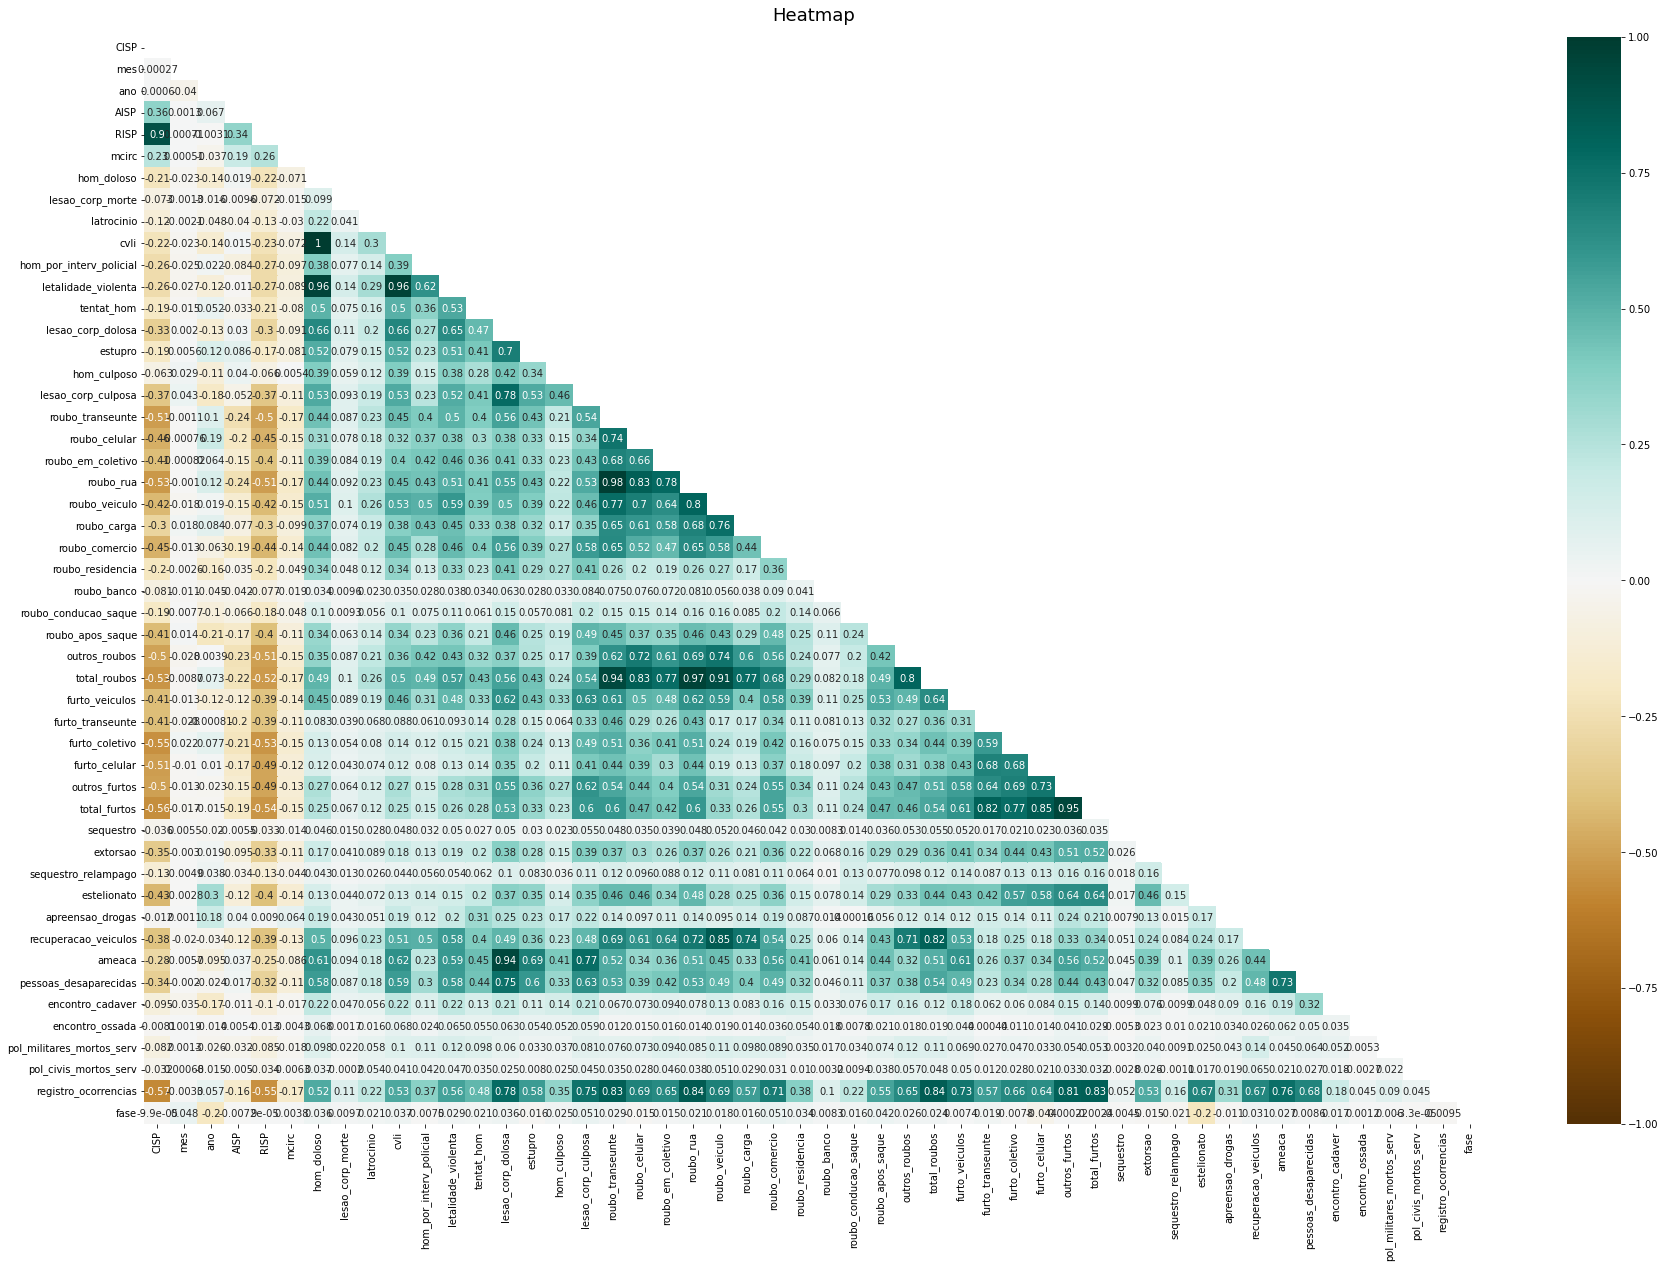

In [65]:
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap', fontdict={'fontsize':18}, pad=16);

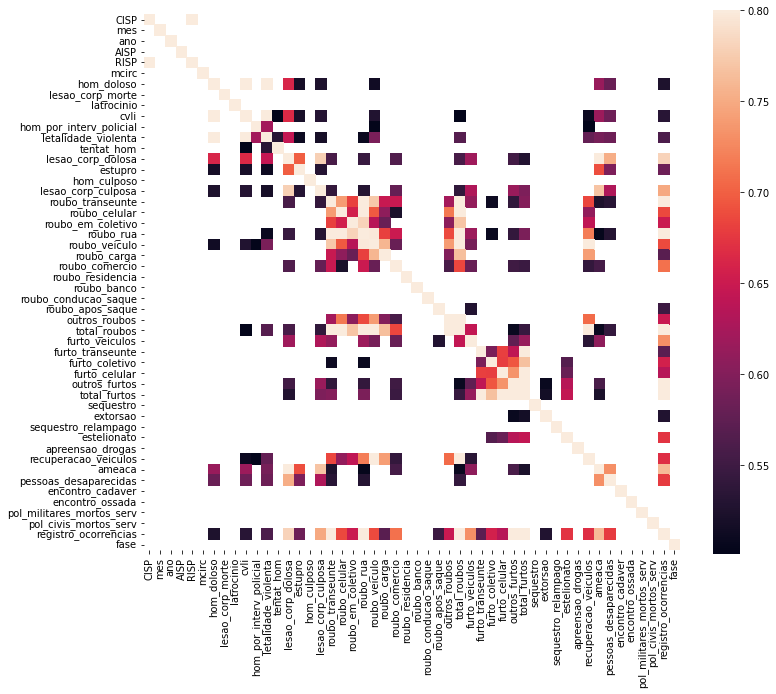

In [79]:
corr[corr>0.5]

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr[corr>0.5], vmax=.8, square=True)

In [94]:
for i in df.columns:
    ##print(f'\nColuna: {i}, {df_merge[i].unique()}')
    print(i)
    print(df[i].value_counts(normalize=True).reset_index())

CISP
     index      CISP
0        1  0.007447
1      105  0.007447
2      123  0.007447
3      122  0.007447
4      121  0.007447
..     ...       ...
133     67  0.004392
134     70  0.004392
135    132  0.004392
136     11  0.003278
137     45  0.001941

[138 rows x 2 columns]
mes
    index       mes
0       6  0.085511
1       4  0.085479
2       5  0.085479
3       1  0.085415
4       2  0.085415
5       3  0.085415
6      12  0.081278
7       8  0.081214
8       9  0.081214
9      10  0.081214
10     11  0.081214
11      7  0.081151
ano
    index       ano
0    2018  0.052700
1    2017  0.052700
2    2016  0.052700
3    2015  0.052700
4    2014  0.052700
5    2020  0.052318
6    2021  0.052318
7    2019  0.052318
8    2013  0.052000
9    2011  0.051936
10   2012  0.051936
11   2010  0.050473
12   2009  0.050027
13   2008  0.049868
14   2004  0.049645
15   2007  0.049645
16   2006  0.049645
17   2005  0.049645
18   2003  0.048563
19   2022  0.026159
mes_ano
       index   mes_ano
